In [1]:
import sys
import os
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import math
import _pickle as pickle

sys.path.insert(0,'..')
import pyathena as pa

In [2]:
import pandas as pd

from pyathena import LoadSim
from pyathena.util.units import Units

from pyathena.tigress_ncr.hst import Hst
from pyathena.tigress_ncr.load_sim_tigress_ncr import LoadSimTIGRESSNCRAll

In [3]:
models = dict(classic = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8/',
              ncr = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8/',
              no_spiral = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8/',
              no_spiral_early = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3/')
              #demo = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y2.xy1024.eps0.np768.has/')
sa = pa.LoadSimTIGRESSNCRAll(models)

# MODELS
ncr = sa.set_model('ncr')
classic = sa.set_model('classic')
no_spiral = sa.set_model('no_spiral')
no_spiral_early = sa.set_model('no_spiral_early')
#demo = sa.set_model('demo')

#ds = s.load_vtk(s.nums[0])

LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
/home/comejuliet/miniconda3/envs/pyathena/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WA

In [4]:
sa.models

['classic', 'ncr', 'no_spiral', 'no_spiral_early']

In [13]:
s.domain['Lx'][0]

2048

In [5]:
# READING HISTORY FILES - DEMO doesn't work

#for i, mdl in enumerate(sa.models): 
    #s = sa.set_model(mdl)
    #h = s.read_hst()

In [6]:
# list of stuff available from hst reading
s = ncr 
h = s.read_hst()
list = h.columns
for p in list:
    print(p)

time_code
time
time_orb
dt_code
dt
mass
mass_sp
mass0
mass1
mass2
mass3
mass4
M_HI
Sigma_HI
M_H2
Sigma_H2
M_HII
Sigma_HII
massflux_lbd_d
massflux_ubd_d
mass_out
Sigma_gas
Sigma_sp
Sigma_out
H
mf_c
vf_c
H_c
mf_u
vf_u
H_u
mf_w1
vf_w1
H_w1
mf_w2
vf_w2
H_w2
mf_h1
vf_h1
H_h1
mf_h2
vf_h2
H_h2
mf_w
vf_w
H_w
mf_2p
vf_2p
H_2p
KE
ME
v1
vA1
v1_2p
v2
vA2
v2_2p
v3
vA3
v3_2p
cs
Pth_mid
Pth_mid_2p
Pturb_mid
Pturb_mid_2p
nmid
nmid_2p
sfr10
sfr40
sfr100
Ltot_PH
Lesc_PH
Leps_PH
Ldust_PH
Qtot_PH
Qesc_PH
Qdust_PH
Qtot_cum_PH
Qesc_cum_PH
fesc_PH
fesc_cum_PH
Ltot_LW
Lesc_LW
Leps_LW
Ldust_LW
Qtot_LW
Qesc_LW
Qdust_LW
Qtot_cum_LW
Qesc_cum_LW
fesc_LW
fesc_cum_LW
Ltot_PE
Lesc_PE
Leps_PE
Ldust_PE
Qtot_PE
Qesc_PE
Qdust_PE
Qtot_cum_PE
Qesc_cum_PE
fesc_PE
fesc_cum_PE
Qieff
fion
fion_cum
fesc_FUV
fesc_cum_FUV
xi_CR0


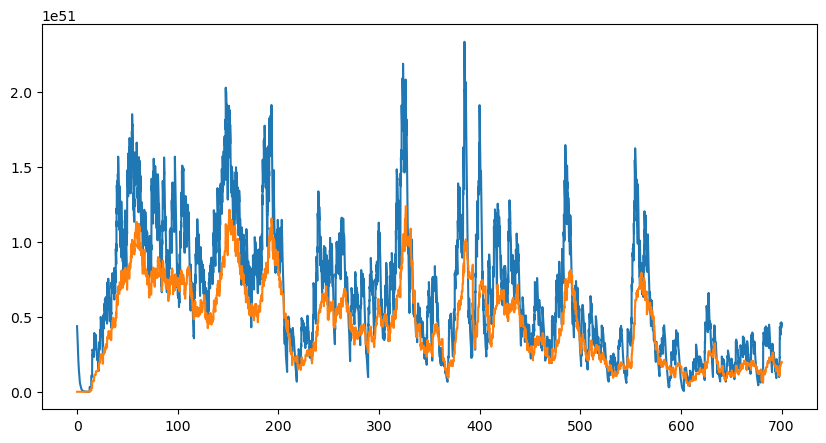

In [22]:
plt.figure(figsize=(10,5))
Lx = s.domain['Lx'][0]/10**3
Ly = s.domain['Lx'][1]/10**3
plt.plot(h['Qtot_PH']/(Lx*Ly))
plt.plot(h['sfr10']*1.e53)

In [116]:
# problem parameters

s.par['problem']

{'gamma': 1.66666667,
 'surf': 12.0,
 'sz0': 10,
 'vturb': 10,
 'beta': 10,
 'qshear': 1.0,
 'Omega': 0.028,
 'SurfS': 42.0,
 'zstar': 245.0,
 'rhodm': 0.0064,
 'R0': 8000,
 'Sigma_SFR': 0.005,
 'pattern': 0.5,
 'marm': 2,
 'F0': 0.2,
 'tmax_sp': 100,
 'Z_gas': 1.0,
 'Z_dust': 1.0,
 'xi_CR_amp': 1.0,
 'rho_crit': 1.0,
 'starpar_iacc': 0,
 'muH': 1.4,
 'Sigma_gas0': 10.0,
 'Sigma_SFR0': 0.0025,
 'tdecay_CR': -1.0}

In [117]:
print(h['time'])

time_code
0.000000        0.000000
0.014534        0.014211
0.020292        0.019841
0.032054        0.031343
0.044298        0.043314
                 ...    
699.962149    684.417545
699.971018    684.426216
699.980046    684.435045
699.991439    684.446184
700.000000    684.454555
Name: time, Length: 70004, dtype: float64


In [219]:
print(s.nums)

[210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700]


In [53]:
# to plot the spiral potential that reaches full strength at tmax_sp
len(h['time'])

70004

In [105]:
# Spiral potential is increased slowly
F = [0.0]*70004
time = np.asarray(h['time'])
for i in range(70004):
    if (time[i] < 100):
        F[i] = 0.2/np.exp(np.sqrt(100-time[i])/np.sqrt(50))
    else:
        F[i] = 0.2       

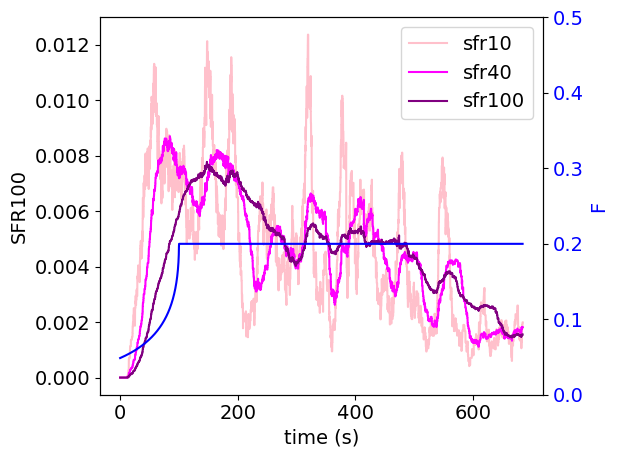

In [229]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('SFR100')
ax1.plot(h['time'],h['sfr10'], color='pink',label='sfr10')
ax1.plot(h['time'],h['sfr40'], color='magenta',label='sfr40')
ax1.plot(h['time'],h['sfr100'], color='purple',label='sfr100')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('F', color='blue')  # we already handled the x-label with ax1
ax2.plot(h['time'],F, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0,0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
plt.show()

### Plots of different time snapshots

In [128]:
#loading VTK files at different times 

s = ncr

ds1 = s.load_vtk(s.nums[0])
ds2 = s.load_vtk(s.nums[13])
ds3 = s.load_vtk(s.nums[27])

fields1 = ds1.get_field(['density','T','nH','rho','vz','vy','vx','Bmag','Bx','By',])
fields2 = ds2.get_field(['density','T','nH','rho','vz','vy','vx','Bmag','Bx','By',])
fields3 = ds3.get_field(['density','T','nH','rho','vz','vy','vx','Bmag','Bx','By',])

#calculating surface densities at different times 
sigma1 = np.trapz(fields1['density'],axis=0)
sigma2 = np.trapz(fields2['density'],axis=0)
sigma3 = np.trapz(fields3['density'],axis=0)

In [129]:
# DOMAIN INFO
ds1.domain

{'all_grid_equal': True,
 'ngrid': 768,
 'le': array([-1024., -1024., -3072.], dtype=float32),
 're': array([1024., 1024., 3072.], dtype=float32),
 'dx': array([8., 8., 8.], dtype=float32),
 'Lx': array([2048., 2048., 6144.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([256, 256, 768]),
 'ndim': 3,
 'time': 210.0011}

In [131]:
# reading starpar files

def mass_norm(mass):
    return np.sqrt(mass/10)
    
agemax = 40

sp1 = s.load_starpar_vtk(num=s.nums[0])
sp1['mage'] *= s.u.Myr
sp1['mass'] *= s.u.Msun
sp1['x1'] *= s.u.kpc
sp1['x2'] *= s.u.kpc
sp1['x3'] *= s.u.kpc
sp1 = sp1[sp1.mage<agemax]

sp2 = s.load_starpar_vtk(num=s.nums[13])
sp2['mage'] *= s.u.Myr
sp2['mass'] *= s.u.Msun
sp2['x1'] *= s.u.kpc
sp2['x2'] *= s.u.kpc
sp2['x3'] *= s.u.kpc
sp2 = sp2[sp2.mage<agemax]

sp3 = s.load_starpar_vtk(num=s.nums[27])
sp3['mage'] *= s.u.Myr
sp3['mass'] *= s.u.Msun
sp3['x1'] *= s.u.kpc
sp3['x2'] *= s.u.kpc
sp3['x3'] *= s.u.kpc
sp3 = sp3[sp3.mage<agemax]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


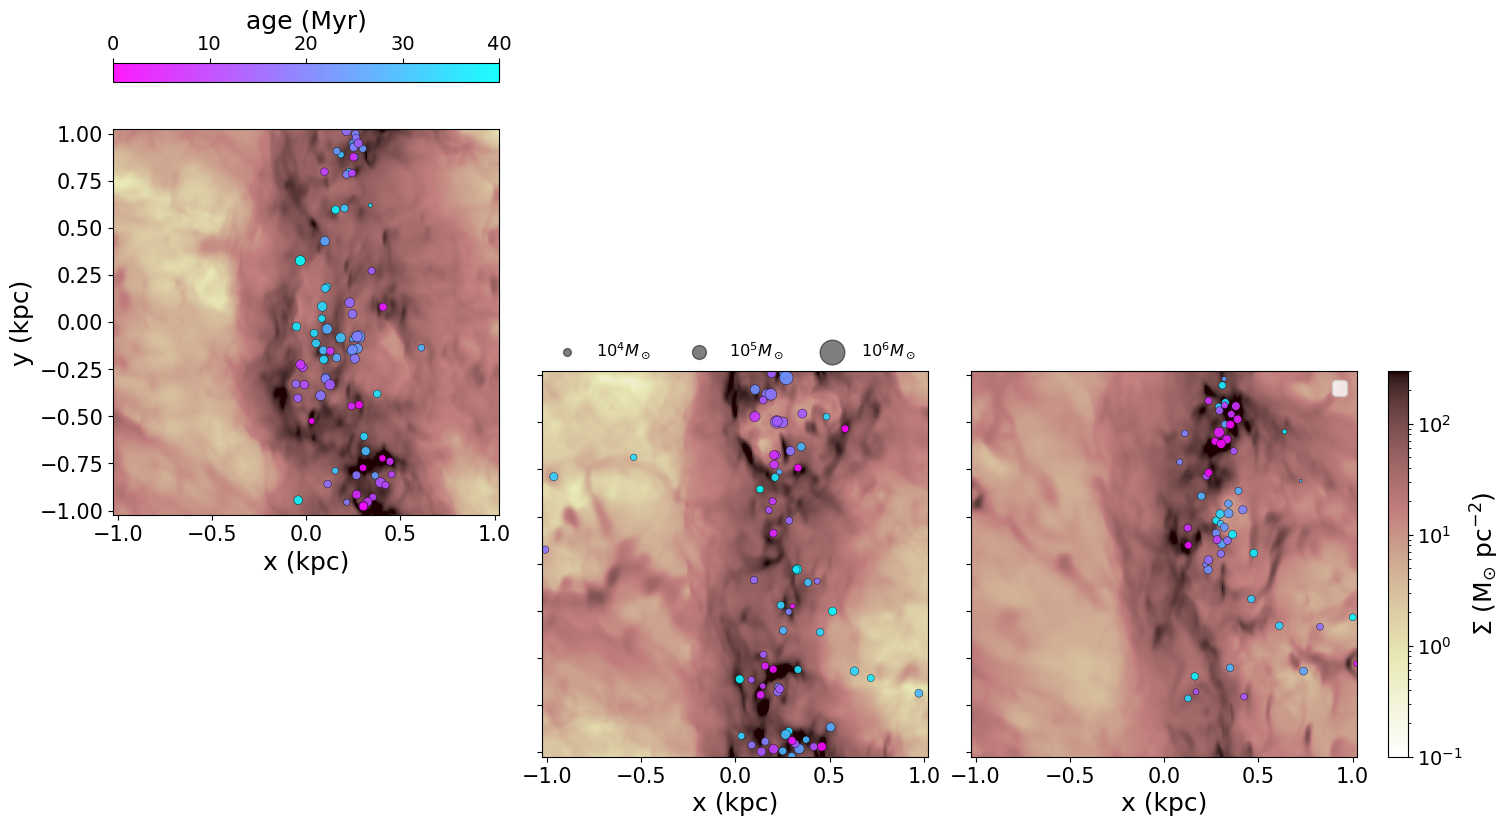

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(15,10), layout = 'constrained', sharey = True)
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)

im1 = axes[0].imshow(sigma1[:,:], norm=LogNorm(vmin=1.e-1, vmax=3e2), origin='lower',cmap='pink_r', extent=[-1.024,1.024,-1.024,1.024])
im2 = axes[1].imshow(sigma2[:,:], norm=LogNorm(vmin=1.e-1, vmax=3e2), origin='lower',cmap='pink_r',extent=[-1.024,1.024,-1.024,1.024])
im3 = axes[2].imshow(sigma3[:,:], norm=LogNorm(vmin=1.e-1, vmax=3e2), origin='lower',cmap='pink_r',extent=[-1.024,1.024,-1.024,1.024])

cbar3 = plt.colorbar(im3,ax=axes[2],location='right',fraction=0.05).set_label(label='$\Sigma$ (M$_{\odot}$ pc$^{-2})$', size=18)

im1 = axes[0].scatter(sp1['x1'], sp1['x2'], marker='o', s=mass_norm(sp1.mass), c=sp1.mage,
                edgecolor='black', linewidth=0.3, vmax=agemax, vmin=0, cmap='cool_r', zorder=2, alpha=0.9)
im2 = axes[1].scatter(sp2['x1'], sp2['x2'], marker='o', s=mass_norm(sp2.mass), c=sp2.mage,
                edgecolor='black', linewidth=0.3, vmax=agemax, vmin=0, cmap='cool_r', zorder=2, alpha=0.9)
im3 = axes[2].scatter(sp3['x1'], sp3['x2'], marker='o', s=mass_norm(sp3.mass), c=sp3.mage,
                edgecolor='black', linewidth=0.3, vmax=agemax, vmin=0, cmap='cool_r', zorder=2, alpha=0.9)

for im in (im1, im2, im3):
    im.axes.set_xlabel('x (kpc)',fontsize=18)
    
im1.axes.set_ylabel('y (kpc)',fontsize=18)
    
im1.axes.tick_params(axis='both', labelsize =15)
im2.axes.tick_params(axis='x', labelsize =15)
im3.axes.tick_params(axis='x', labelsize =15)

cbar1 = plt.colorbar(im1,ax=axes[0],location='top',fraction=0.1).set_label(label='age (Myr)',size=18)


# making the legend for star particle masses
def sp_legend(ax,ref_mass=[1.e4,1.e5,1.e6]):
    ext=ax.images[0].get_extent()

    #plot particle references outside of the domain of interest
    s=[]
    label=[]
    for mass in ref_mass:
        s.append(ax.scatter(ext[1]*2,ext[3]*2,s=mass_norm(mass),color='k',alpha=.5))
        label.append(r'$10^%d M_\odot$' % np.log10(mass))
    ax.set_xlim(ext[0],ext[1])
    ax.set_ylim(ext[2],ext[3])
    legend=ax.legend(s,label,borderaxespad=0.1,scatterpoints=1,loc=2,ncol=3,fontsize='small',bbox_to_anchor=(0.0, 1.1), frameon=False)
    
    return legend

leg=sp_legend(ax=axes[1])


plt.legend()
plt.show()

In [72]:
#Streamline plots of the vertically integrated magnetic fields
#FIG2

Bx1_int = np.trapz(fields1['Bx']*fields1['density']*s.u.muG,axis=0)
By1_int = np.trapz(fields1['By']*fields1['density']*s.u.muG,axis=0)

Bx1 = Bx1_int/sigma1
By1 = By1_int/sigma1

Bx2_int = np.trapz(fields2['Bx']*fields2['density']*s.u.muG,axis=0)
By2_int = np.trapz(fields2['By']*fields2['density']*s.u.muG,axis=0)

Bx2 = Bx2_int/sigma2
By2 = By1_int/sigma2


Bx3_int = np.trapz(fields3['Bx']*fields3['density']*s.u.muG,axis=0)
By3_int = np.trapz(fields3['By']*fields3['density']*s.u.muG,axis=0)

Bx3 = Bx3_int/sigma3
By3 = By3_int/sigma3

dn=12
x = fields1['x'][::dn]
y = fields1['y'][::dn]
X, Y = np.meshgrid(x, y)

u1 = Bx1[::dn,::dn]
v1 = By1[::dn,::dn]

u2 = Bx2[::dn,::dn]
v2 = By2[::dn,::dn]

u3 = Bx3[::dn,::dn]
v3 = By3[::dn,::dn]

color1 = np.log(np.sqrt(u1**2.+v1**2.))
color2 = np.log(np.sqrt(u2**2.+v2**2.))
color3 = np.log(np.sqrt(u3**2.+v3**2.))

/tmp/ipykernel_227184/1825828159.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(wspace=0,hspace=0.1)


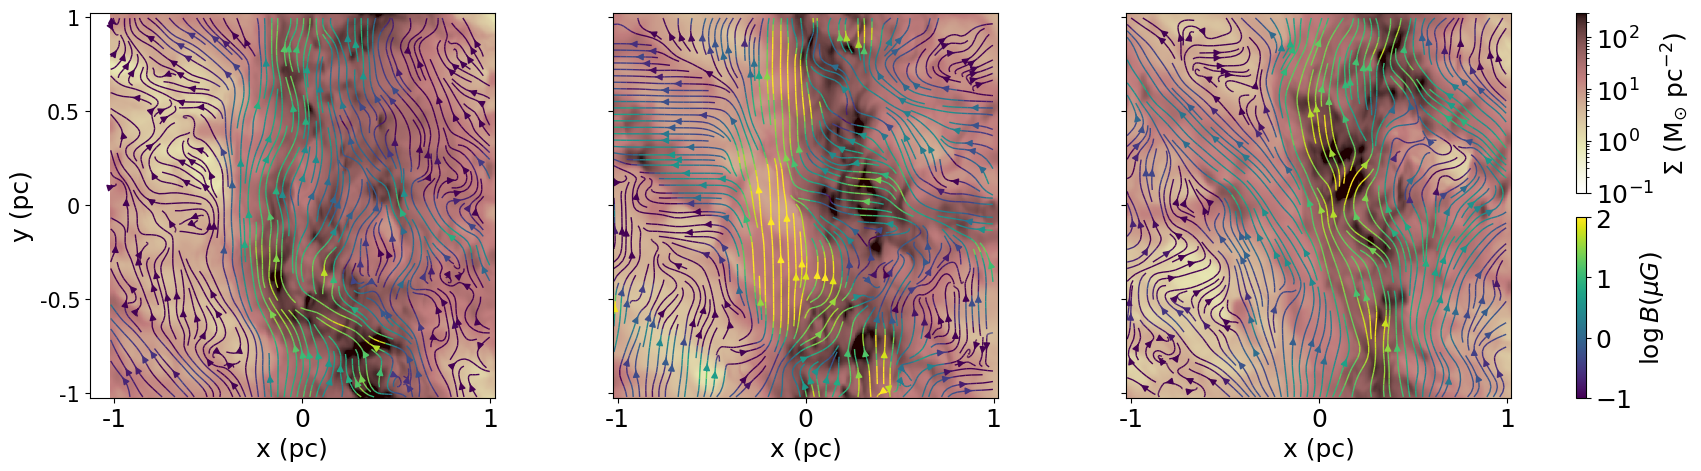

In [80]:
fig = plt.figure(figsize=(20,5))  
#fig.subplots_adjust(hspace=0.1,wspace=0.1)

cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)
gs = fig.add_gridspec(3, 4, height_ratios=[0.5, 0.0005, 0.5], width_ratios=[1, 1, 1, 0.02])
gs.tight_layout(fig,w_pad=5.)

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[:, 2], sharey=ax1)
fig.subplots_adjust(wspace=0,hspace=0.1)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)

im1 = ax1.imshow(sigma1[:,:], norm=LogNorm(vmin=1.e-1, vmax=3e2), origin='lower',cmap='pink_r',extent=[-1024,1024,-1024,1024])
im2 = ax2.imshow(sigma2[:,:], norm=LogNorm(vmin=1.e-1, vmax=3e2), origin='lower',cmap='pink_r',extent=[-1024,1024,-1024,1024])
im3 = ax3.imshow(sigma3[:,:], norm=LogNorm(vmin=1.e-1, vmax=3e2), origin='lower',cmap='pink_r',extent=[-1024,1024,-1024,1024])

im1.axes.tick_params(axis='both', labelsize =18)
im2.axes.tick_params(axis='x', labelsize =18)
im3.axes.tick_params(axis='x', labelsize =18)

for im in (im1,im2,im3):
    im.axes.set_xticks([-1000,0,1000],labels=[-1,0,1],fontsize=18)

im1.axes.set_yticks([-2000,-1500,-1000,-500,0,500,1000,1500,2000],labels=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2],fontsize=15)

cax1 = fig.add_subplot(gs[0, 3])
#plt.colorbar(im1, cax=cax1, orientation='vertical',label='nH')
plt.colorbar(im1, cax = cax1, pad = 0.001).set_label(label='$\Sigma$ (M$_{\odot}$ pc$^{-2})$',size=18)
cax1.axes.tick_params(axis="y", labelsize=18)

for im in (im1, im2, im3):
    im.axes.set_xlabel('x (pc)',fontsize=18)
im1.axes.set_ylabel('y (pc)',fontsize=18)

streamplot_norm = mpl.colors.Normalize(vmin=-1, vmax=2.0)

im1 = ax1.streamplot(X, Y, u1, v1, density=2, color = color1, linewidth = 1, cmap ='viridis', norm = streamplot_norm)
im2 = ax2.streamplot(X, Y, u2, v2, density=2, color = color2, linewidth = 1, cmap ='viridis', norm = streamplot_norm)
im3 = ax3.streamplot(X, Y, u3, v3, density=2, color = color3, linewidth = 1, cmap ='viridis', norm = streamplot_norm)

cax2 = fig.add_subplot(gs[2, 3])
#plt.colorbar(im2.lines, cax = cax2, orientation='vertical')
plt.colorbar(im2.lines, cax = cax2, pad = 0.001).set_label(label='$\log{B} (\mu G)$',size=18)
cax2.axes.tick_params(axis="y", labelsize=18)

plt.show()

## Fundamental quantities 

In [21]:
#LOADING JUST ONE FILE for colorplots
s = no_spiral

num = s.nums[5]
ds = s.load_vtk(num=num)
fields = ds.get_field(['density','pressure','T','nH','rho','vz','vy','vx','Bmag','Bx','By'])
    
sp = s.load_starpar_vtk(num=num)
sp['mage'] *= s.u.Myr
sp['mass'] *= s.u.Msun
sp['x1'] *= s.u.kpc
sp['x2'] *= s.u.kpc
sp['x3'] *= s.u.kpc

sp = sp[sp.mage<agemax]

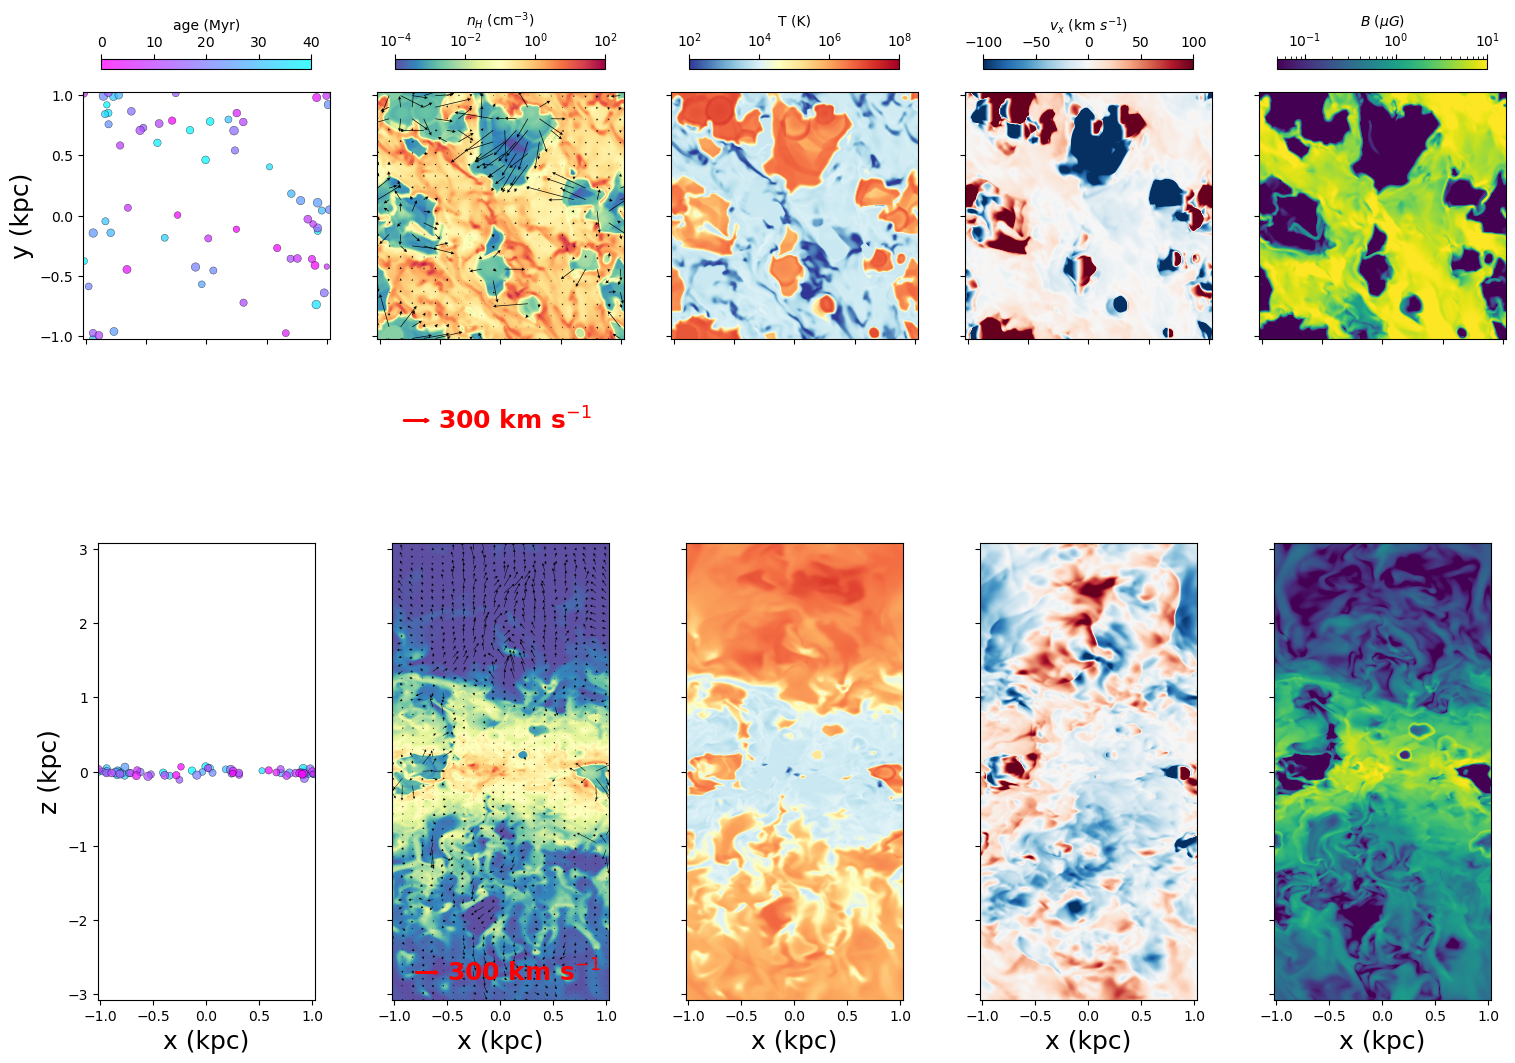

In [22]:
#plotting quantities on 2D color maps
#FIG3

iz = ds.domain['Nx'][2] // 2
iy = ds.domain['Nx'][1] // 2

vx1=fields['vx'][iz,:,:]
vy=fields['vy'][iz,:,:]

vx2=fields['vx'][:,iy,:]
vz=fields['vz'][:,iy,:]

dn=12
vU1=vx1[::dn, ::dn]
vU2=vx2[::dn, ::dn]
vVy=vy[::dn, ::dn]
vVz=vz[::dn, ::dn]

fig, axes = plt.subplots(2, 5, figsize=(15,10), sharex = True)
fig.tight_layout( w_pad=0.000001, h_pad=1.0)
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)

###########################################################################################################################################
#UPPER PANELS
im1 = axes[0,0].imshow(fields['nH'][iz,:,:]/fields['nH'][iz,:,:], norm=LogNorm(), origin='lower', cmap='Greys',extent=[-1.024,1.024,-1.024,1.024])
im1 = axes[0,0].scatter(sp['x1'], sp['x2'], marker='o', s=mass_norm(sp.mass), c=sp.mage,
                edgecolor='black', linewidth=0.3, vmax=agemax, vmin=0, cmap='cool_r', zorder=2, alpha=0.75)
plt.colorbar(im1,ax=axes[0,0],label='age (Myr)', location='top',fraction=0.023)

im2 = axes[0,1].imshow(fields['density'][iz,:,:], norm=LogNorm(vmin=1.e-4, vmax=1e2), origin='lower', cmap='Spectral_r',extent=[-1.024,1.024,-1.024,1.024])
axes[0,1].set_yticklabels([])
im2 = axes[0,1].quiver(fields['x'][::dn]/1000.,fields['y'][::dn]/1000.,vU1,vVy,scale=3000,linewidths=1.5,headwidth=5)
plt.quiverkey(im2,-0.6,-1.7,300,label='300 km s$^{-1}$',labelpos='E',coordinates='data',color='r',
             fontproperties={'size': 18, 'weight':'bold'},labelcolor='r')


im3 = axes[0,2].imshow(fields['T'][iz,:,:], norm=LogNorm(vmin=1.e2, vmax=1e8), origin='lower', 
               cmap=cmap_temp,extent=[-1.024,1.024,-1.024,1.024])
axes[0,2].set_yticklabels([])

im4 = axes[0,3].imshow(fields['vx'][iz,:,:],origin='lower',cmap='RdBu_r', vmin = -100, vmax= 100, extent=[-1.024,1.024,-1.024,1.024])
axes[0,3].set_yticklabels([])

im5 = axes[0,4].imshow(fields['Bmag'][iz,:,:], norm=LogNorm(vmin=5.e-2, vmax=10.), origin='lower',cmap='viridis',extent=[-1.024,1.024,-1.024,1.024])
axes[0,4].set_yticklabels([])
############################################################################################################################################

############################################################################################################################################
#LOWER PANELS
im6 = axes[1,0].imshow(fields['nH'][:,iy,:]/fields['nH'][:,iy,:], norm=LogNorm(), origin='lower',cmap='Greys',extent=[-1.024,1.024,-3.072,3.072])
im6 = axes[1,0].scatter(sp['x1'], sp['x3'], marker='o', s=mass_norm(sp.mass), c=sp.mage,
                edgecolor='black', linewidth=0.3, vmax=agemax, vmin=0, cmap='cool_r', zorder=2, alpha=0.75)

im7 = axes[1,1].imshow(fields['density'][:,iy,:], norm=LogNorm(vmin=1.e-4, vmax=1e2), origin='lower', cmap='Spectral_r', extent=[-1.024,1.024,-3.072,3.072])
axes[1,1].set_yticklabels([])
plt.colorbar(im7,ax=axes[0,1],label='$n_{H}$ (cm$^{-3}$)', location='top',fraction=0.023)
im7 = axes[1,1].quiver(fields['x'][::dn]/1000.,fields['z'][::dn]/1000.,vU2,vVz,scale=3000,linewidths=1.5,headwidth=5)
plt.quiverkey(im7,-0.6,-2.7,300,label='300 km s$^{-1}$',labelpos='E',coordinates='data',color='r',
             fontproperties={'size': 18, 'weight':'bold'},labelcolor='r')

im8 = axes[1,2].imshow(fields['T'][:,iy,:], norm=LogNorm(vmin=1.e2, vmax=1e8), origin='lower', 
               cmap=cmap_temp,extent=[-1.024,1.024,-3.072,3.072])
plt.colorbar(im8,ax=axes[0,2],label='T (K)', location='top',fraction=0.023)
axes[1,2].set_yticklabels([])

im9 = axes[1,3].imshow(fields['vx'][:,iy,:],origin='lower',cmap='RdBu_r', vmin = -100, vmax= 100, extent=[-1.024,1.024,-3.072,3.072])
plt.colorbar(im9,ax=axes[0,3],label='$v_{x}$ (km $s^{-1}$)', location='top',fraction=0.023)
axes[1,3].set_yticklabels([])

im10 = axes[1,4].imshow(fields['Bmag'][:,iy,:], norm=LogNorm(vmin=5e-2, vmax=10), origin='lower',cmap='viridis', extent=[-1.024,1.024,-3.072,3.072])
plt.colorbar(im10,ax=axes[0,4],label='$B$ ($\mu G$)', location='top',fraction=0.023)
axes[1,4].set_yticklabels([])
############################################################################################################################################

for im in (im1, im2, im3, im4, im5):
    im.axes.set_aspect('equal')
    im.axes.sharey
    
for im in (im6, im7, im8, im9, im10):
    im.axes.set_aspect(0.7)
    im.axes.set_xlabel('x (kpc)', fontsize=18)

#im6.axes.set_xlabel('x (kpc)',fontsize=18)    
im1.axes.set_ylabel('y (kpc)', fontsize=18)
#im1.axes.set_aspect(1.)
im6.axes.set_ylabel('z (kpc)', fontsize=18)
#im6.axes.set_aspect(0.9)

plt.show()

## Gas phase distribution

In [82]:
# GAS PHASE DISTRIBUTION

s = classic
num = s.nums[5]
ds = s.load_vtk(num=num)

fields_gas = ds.get_field(['density','temperature', 'xHI', 'xH2', 'xe','nHI'])

In [83]:
temperature = fields_gas['temperature']
density = fields_gas['density']
xH2 = fields_gas['xH2']
xHI = fields_gas['xHI']
xe = fields_gas['xe']

# from Chang-goo's library. Could be useful in the future.
def select_phase(temperature,density,phase='warm'):
    '''
        Select gas phase (setting density[~phase]=0)
        
        phase=['whole','warm','cold','2p','lowd']
        
    '''
    T1=5050.
    T2=2.e4
    dmax=50
    if phase == 'whole': 
        return density
    elif phase == 'warm':
        idx = (temperature < T1) | (temperature > T2)
    elif phase == 'cold': 
        idx = (temperature >= T1) 
    elif phase == '2p': 
        idx = (temperature > T2) 
    elif phase == 'lowd': 
        idx = (temperature > T2) | (density > dmax)
    else:
        print("{} is not supported".format(phase))
        return -1
    
    dnew = np.copy(density)
    dnew[idx] = 0.0

    return dnew


density_warm = select_phase(temperature,density,phase='warm')

/tmp/ipykernel_227184/1149305850.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color_plot = np.zeros_like(temperature[iz,:,:], dtype=np.int)


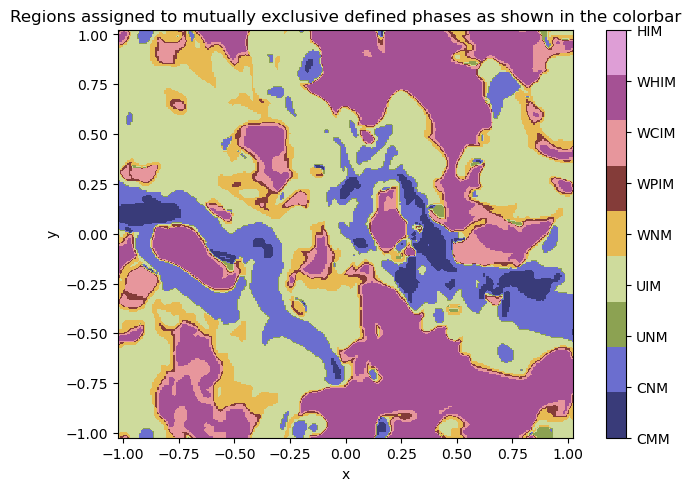

In [84]:
iz = ds.domain['Nx'][2] // 2
from matplotlib.colors import ListedColormap

masks = [
    (temperature[iz,:,:] < 6e3) & (temperature[iz,:,:] > 0) & (xH2[iz,:,:] > 0.25),    
    (temperature[iz,:,:] < 500) & (temperature[iz,:,:] > 0) & (xHI[iz,:,:] > 0.5),    
    (temperature[iz,:,:] < 6e3) & (temperature[iz,:,:] > 500) & (xHI[iz,:,:] > 0.5),    
    (temperature[iz,:,:] < 6e3) & (temperature[iz,:,:] > 0) & (xe[iz,:,:] > 0.5),    
    (temperature[iz,:,:] > 6e3) & (temperature[iz,:,:] < 3.5e4) & (xHI[iz,:,:] > 0.25),     
    (temperature[iz,:,:] > 6e3) & (temperature[iz,:,:] < 1.5e4) & (xe[iz,:,:] > 0.25),
    (temperature[iz,:,:] > 1.5e4) & (temperature[iz,:,:] < 3.5e4) & (xe[iz,:,:] > 0.25),
    (temperature[iz,:,:] > 3.5e4) & (temperature[iz,:,:] < 5e5) & (xe[iz,:,:] > 0.25),
    (temperature[iz,:,:] > 5e5) & (temperature[iz,:,:] > 0) & (xe[iz,:,:] > 0.25),
]

# Create an empty array for the color plot
color_plot = np.zeros_like(temperature[iz,:,:], dtype=np.int)

# Apply conditions and assign colors for each set
i=0
for i in range(len(masks)):
    condition_mask = masks[i]
    color_plot[condition_mask] = i
    i = i+1

# Create a custom colormap with colors
cmap = plt.cm.get_cmap("tab20b", len(masks))

# Create a color plot using imshow
plt.imshow(color_plot, extent=(-1.024,1.024,-1.024,1.024), cmap=cmap, origin='lower', aspect='auto', vmin=1, vmax=len(masks))

# Create a colorbar
cbar = plt.colorbar(ticks=np.arange(1, len(masks) + 1))
labels = ['CMM','CNM','UNM','UIM','WNM','WPIM','WCIM','WHIM','HIM']
cbar.set_ticklabels(labels[i] for i in range(len(masks)))

# Display the plot with the colorbar
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regions assigned to mutually exclusive defined phases as shown in the colorbar')
plt.show()


/tmp/ipykernel_227184/4289031743.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


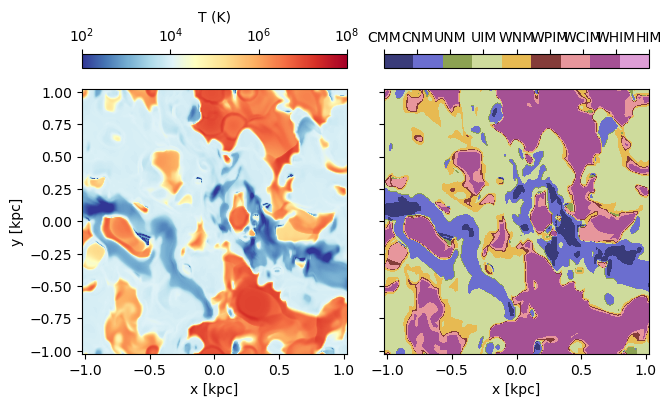

In [86]:
fig, axes = plt.subplots(1, 2, sharey = True)
fig.tight_layout()
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)

im1 = axes[0].imshow(fields_gas['temperature'][iz,:,:], norm=LogNorm(vmin=1.e2, vmax=1e8), origin='lower', 
               cmap=cmap_temp,extent=[-1.024,1.024,-1.024,1.024])
plt.colorbar(im1,ax=axes[0],label='T (K)', location='top')

im2 = axes[1].imshow(color_plot, extent=[-1.024,1.024,-1.024,1.024], cmap=cmap, origin='lower', vmin=1, vmax=len(masks))
cbar = plt.colorbar(im2,ax=axes[1],ticks=np.arange(1, len(masks) + 1), location='top')
labels = ['CMM','CNM','UNM','UIM','WNM','WPIM','WCIM','WHIM','HIM']
cbar.set_ticklabels(labels[i] for i in range(len(masks)))

for im in (im1,im2):
    im.axes.set_xlabel('x [kpc]')

im1.axes.set_ylabel('y [kpc]')



plt.show()

## Star particle position histogram 

In [267]:
models = dict(classic = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8/',
              ncr = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8/',
              no_spiral = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8/')

sa = pa.LoadSimTIGRESSNCRAll(models)

# MODELS
ncr = sa.set_model('ncr')
classic = sa.set_model('classic')
no_spiral = sa.set_model('no_spiral')

LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
/home/comejuliet/miniconda3/envs/pyathena/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WA

In [268]:
sa.models

['classic', 'ncr', 'no_spiral']

In [210]:
# STAR PARTICLE HISTOGRAM

s = classic

num = s.nums[5]
ds = s.load_vtk(num=num)
fields_hist = ds.get_field(['density','nH'])
    

def mass_norm(mass):
    return np.sqrt(mass/10)
    
sp = s.load_starpar_vtk(num=num)
sp['mage'] *= s.u.Myr
sp['mass'] *= s.u.Msun
sp['x1'] *= s.u.kpc
sp['x2'] *= s.u.kpc
sp['x3'] *= s.u.kpc

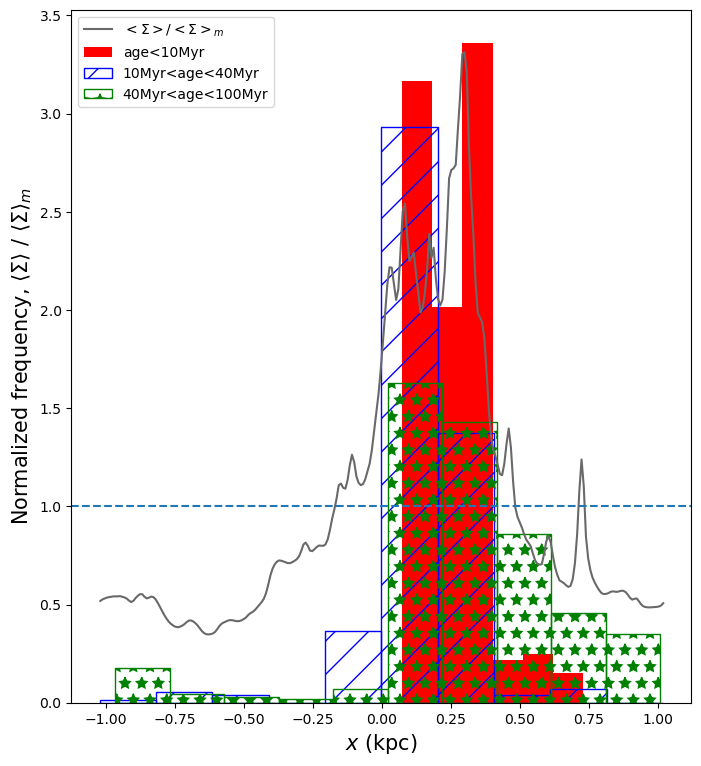

In [211]:
#FIG 4

#calculating the normalized surface density from the vtk file
sigma = np.trapz(fields_hist['nH'],axis=0)
sigma_yavg = (np.trapz(sigma,axis=0))/256
sigma_mean = (np.trapz(sigma_yavg,axis=0))/256

fig = plt.figure(figsize=(8,9))

fig = plt.plot(fields_hist['x']/1000,sigma_yavg/sigma_mean,label= '$<\Sigma>/<\Sigma>_{m}$',color = 'dimgray')

#finding the mass weighted positions of star particles in the x-direction from the starpar file
youngage = 10
adultage = 40
oldage = 100
sp10 = sp[sp.mage<youngage]
sp40 = sp[np.logical_and(sp.mage>youngage, sp.mage<adultage)]
sp100 = sp[np.logical_and(sp.mage>adultage, sp.mage<oldage)]

fig = plt.hist(sp10.x1, density=True, weights=sp10.mass,color="red", label='age<10Myr')
fig = plt.hist(sp40.x1, density=True, weights=sp40.mass,fill=False,hatch='/', ec="blue", label= '10Myr<age<40Myr')
fig = plt.hist(sp100.x1, density=True, weights=sp100.mass,fill=False,hatch='*', ec="green", label= '40Myr<age<100Myr')

fig = plt.axhline(1.,linestyle= '--')

plt.legend(loc=2)
plt.xlabel(r'$x$ (kpc)',fontsize = 15)
plt.ylabel(r'Normalized frequency, $\langle\Sigma\rangle$ / $\langle\Sigma\rangle$$_{m}$',fontsize = 15)
plt.show()


In [212]:
# comparison between the sp distributions in different models
# overplot of median to compare 

mpl.rcParams['font.size'] = 14
fig = plt.figure(figsize=(5,6))

legend = ['classic', 'ncr', 'no spiral']

for i, mdl in enumerate(sa.models): 
    
    s = sa.set_model(mdl)
    num = s.nums[5]
    ds = s.load_vtk(num=num)
    fields_hist = ds.get_field(['density','pressure','T','nH','rho','vz','vy','vx','Bmag','Bx','By'])
    
    sigma = np.trapz(fields_hist['nH'],axis=0)
    sigma_yavg = (np.trapz(sigma,axis=0))/256
    sigma_mean = (np.trapz(sigma_yavg,axis=0))/256
    
    fig = plt.plot(fields_hist['x']/1000,sigma_yavg/sigma_mean)
    
    plt.xlabel(r'$x$ (kpc)',fontsize = 15)
    plt.ylabel(r'$\langle\Sigma\rangle$ / $\langle\Sigma\rangle$$_{m}$',fontsize = 15)
    plt.legend(legend)


KeyboardInterrupt: 

<Figure size 500x600 with 0 Axes>

In [245]:
# temporal averaged star particle position histogram for each model

# STAR PARTICLE HISTOGRAM

s = no_spiral

strtimelist = ['210','220','230','240','250','260','270','280','290','300','310','320','330','340','350','360','370','380','390',
              '400','410','420','430','440','450','460']
npt = len(strtimelist)
sigma = [0.0]*(npt)

sigma_yavg = [0.0]*(npt)
sigma_mean = [0.0]*(npt)
sp10 = [0.0]*(npt)
sp40 = [0.0]*(npt)
sp100 = [0.0]*(npt)

spx_hist = []
spx40_hist = []
spx100_hist = []
x_hist = []
x40_hist = []
x100_hist = []

for i in range(npt):
    strtime = strtimelist[i]
    #surf_file='surf/R8_8pc_NCRSP_spiral_ncr.0'+strtime+'.surf.p'
    #surf_file='surf/R8_8pc_NCRSP_spiral_classic.0'+strtime+'.surf.p'
    surf_file='surf/R8_8pc_NCRSP_ncr.0'+strtime+'.surf.p'
    surf=pickle.load(open(surf_file,'rb'))
    sigma[i] = surf['data']
    
    def mass_norm(mass):
        return np.sqrt(mass/10)
    
    sp = s.load_starpar_vtk(num=s.nums[i])
    sp['mage'] *= s.u.Myr
    sp['mass'] *= s.u.Msun
    sp['x1'] *= s.u.kpc
    
    #calculating the normalized surface density from the vtk file
    sigma_yavg[i]=np.trapz(sigma[i],axis=0)/256
    sigma_mean[i]= np.trapz(sigma_yavg[i],axis=0)/256

    #finding the mass weighted positions of star particles in the x-direction from the starpar file
    youngage = 10
    adultage = 40
    oldage = 100
    sp10[i] = sp[sp.mage<youngage]
    sp40[i] = sp[np.logical_and(sp.mage>youngage, sp.mage<adultage)]
    sp100[i] = sp[np.logical_and(sp.mage>adultage, sp.mage<oldage)]
    
    pos10 = np.zeros((npt,10),dtype=object)
    pos40 = np.zeros((npt,10),dtype=object)
    pos100 = np.zeros((npt,10),dtype=object)
    
    xbin = np.zeros((npt,11))
    (pos10[i,:], xbin[i,:]) = np.histogram(sp10[i].x1, density= True, weights=sp10[i].mass)
    spx10_hist.append(pos10[i,:])
    x_hist.append(xbin[i,:])
    
    xbin = np.zeros((npt,11))
    (pos40[i,:], xbin[i,:]) = np.histogram(sp40[i].x1, density= True, weights=sp40[i].mass)
    spx40_hist.append(pos40[i,:])
    x_hist.append(xbin[i,:])
    
    xbin = np.zeros((npt,11))
    (pos100[i,:], xbin[i,:]) = np.histogram(sp100[i].x1, density= True, weights=sp100[i].mass)
    spx100_hist.append(pos100[i,:])
    x_hist.append(xbin[i,:])
    

(-1.0, 1.0)

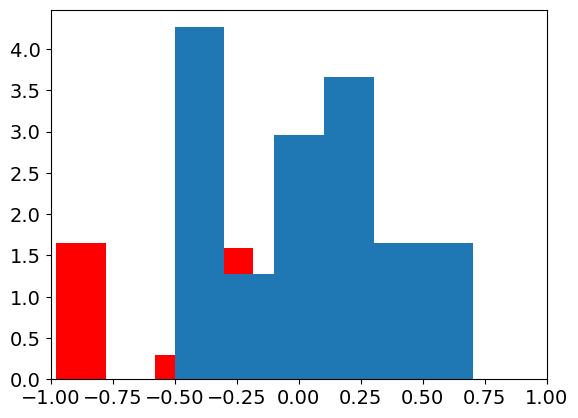

In [246]:
# WHY ARE THEY SHIFTED?????

plt.hist(sp10[10].x1, density=True, weights=sp10[10].mass,color="red")

plt.bar(x_hist[0][:-1],spx10_hist[10], width=np.diff(x_hist[0]))
plt.xlim(-1,1)

In [247]:
#THESE VALUES ARE TOO LOW

print(x_hist[8])


[-1.02017163 -0.81638795 -0.61260426 -0.40882057 -0.20503689 -0.0012532
  0.20253048  0.40631417  0.61009785  0.81388154  1.01766522]


(-1.0, 1.0)

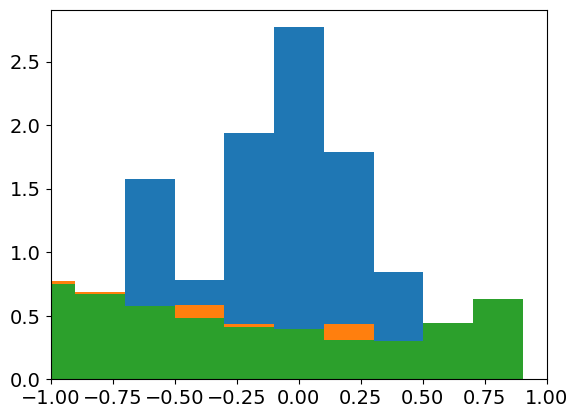

In [248]:
# now i have to make the time average 
spx10_matrix = np.zeros((10,26))
spx10_hist_avg = np.zeros(10)
spx40_matrix = np.zeros((10,26))
spx40_hist_avg = np.zeros(10)
spx100_matrix = np.zeros((10,26))
spx100_hist_avg = np.zeros(10)


for l in range(26):
    spx10_matrix[:,l] = spx10_hist[l][:]
    spx40_matrix[:,l] = spx40_hist[l][:]
    spx100_matrix[:,l] = spx100_hist[l][:]
for k in range(10):
    spx10_hist_avg[k] = np.average(spx10_matrix[k,:])
    spx40_hist_avg[k] = np.average(spx40_matrix[k,:])
    spx100_hist_avg[k] = np.average(spx100_matrix[k,:])
    
plt.bar(x_hist[0][:-1],spx10_hist_avg, width=np.diff(x_hist[0]))
plt.bar(x_hist[0][:-1],spx40_hist_avg, width=np.diff(x_hist[0]))
plt.bar(x_hist[0][:-1],spx100_hist_avg, width=np.diff(x_hist[0]))

plt.xlim(-1,1)

In [249]:
sigma_yavg_t = [0.0]*256
for j in range(256):
    for i in range(26):
        sigma_yavg_t[j] = np.average(sigma_yavg[i][j]) 
sigma_mean_t = np.average(sigma_mean)

In [250]:
ds = s.load_vtk(num=s.nums[0])
coord_hist = ds.get_field(['density'])

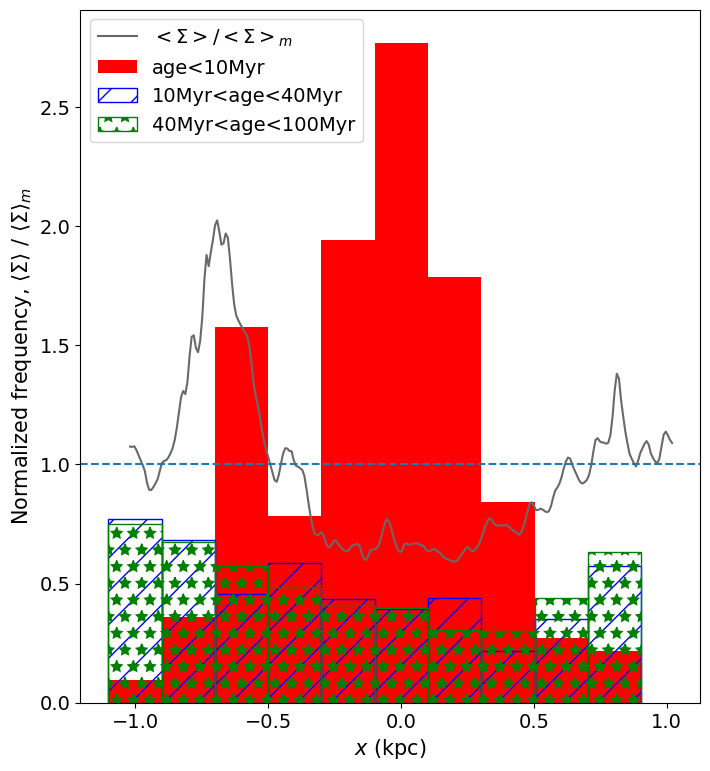

In [251]:
fig = plt.figure(figsize=(8,9))

fig = plt.plot(coord_hist['x']/1000, sigma_yavg_t/sigma_mean_t,label= '$<\Sigma>/<\Sigma>_{m}$',color = 'dimgray')

fig = plt.bar(x_hist[0][:-1], spx10_hist_avg, width=np.diff(x_hist[0]), color="red", label='age<10Myr')
fig = plt.bar(x_hist[0][:-1], spx40_hist_avg, width=np.diff(x_hist[0]),fill=False,hatch='/', ec="blue", label= '10Myr<age<40Myr')
fig = plt.bar(x_hist[0][:-1],spx100_hist_avg, width=np.diff(x_hist[0]),fill=False,hatch='*', ec="green", label= '40Myr<age<100Myr')

fig = plt.axhline(1.,linestyle= '--')

plt.legend(loc=2)
plt.xlabel(r'$x$ (kpc)',fontsize = 15)
plt.ylabel(r'Normalized frequency, $\langle\Sigma\rangle$ / $\langle\Sigma\rangle$$_{m}$',fontsize = 15)
plt.show()

## Pressure-density PDF

In [49]:
# PDF

#This is domain information
xmin=s.domain['le']
xmax=s.domain['re']
dx=s.domain['dx']

# set up cell centered coordinates
x=np.arange(xmin[0],xmax[0],dx[0])+0.5*dx[0]
y=np.arange(xmin[1],xmax[1],dx[1])+0.5*dx[1]
z=np.arange(xmin[2],xmax[2],dx[2])+0.5*dx[2]

# These set up for operating on arrays with the same dimensions as s slices
#X, Y = np.meshgrid(x,y)
#X, Z = np.meshgrid(x,z)
#Y, Z = np.meshgrid(y,z)


#This sets up for image plots based on the domain physical size
xyextent=[xmin[0],xmax[0],xmin[1],xmax[1]]
xzextent=[xmin[0],xmax[0],xmin[2],xmax[2]]
yzextent=[xmin[1],xmax[1],xmin[2],xmax[2]]
print(xyextent,xzextent,yzextent)

[-1024.0, 1024.0, -1024.0, 1024.0] [-1024.0, 1024.0, -3072.0, 3072.0] [-1024.0, 1024.0, -3072.0, 3072.0]


In [50]:
#This gives the physical size of the domain (x,y,z):
print(s.domain['Lx'])

[2048. 2048. 6144.]


In [51]:
#rough procedure to find the indexes corresponding to the coordinate of xmin and xmax of the arm region

idx_min = np.where(x == -100)
idx_max = np.where( x == 500)
xmin = int(x[idx_min])
xmax = int(x[idx_max])
print(idx_min)
print(idx_max)

(array([115]),)
(array([190]),)


Text(0.5, 0.98, '$\\chi_0=1;\\;\\xi_{\\rm 0}=2\\times 10^{-16}\\,{\\rm s}^{-1}$')

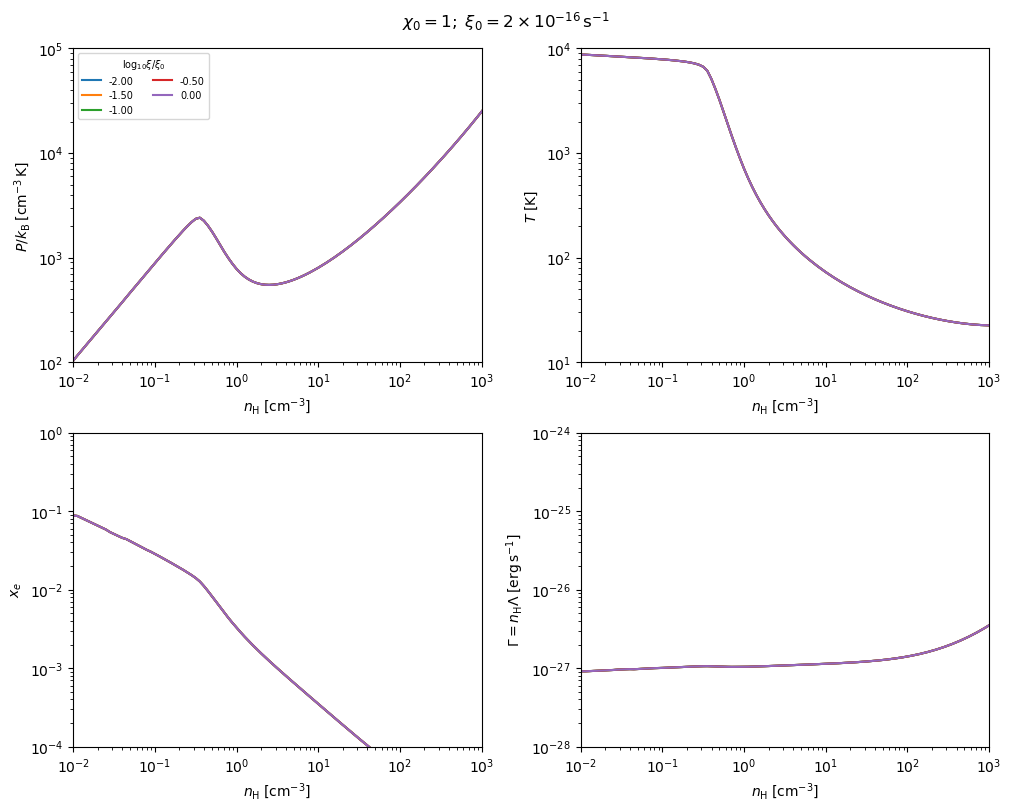

In [52]:
# EQUILIBRIUM CURVE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,2,figsize=(10,8),constrained_layout=True)

xi = np.arange(-2.0,0.5,0.5)
for xi_ in xi:
    #fname = '../data/noshld_zg0.0_zd0.0_xi{0:.2f}.txt'.format(xi_)
    #df = pd.read_csv(fname, sep='\s+')
    df = pd.read_csv('noshld_zg-1.0_zd-1.0_chi-1.0.txt', sep='\s+')
    df['T'] = df['pok']/(df['nH']*(1.1 + df['xe'] - df['xH2']))
    
    axes[0,0].loglog(df['nH'],df['pok'], label='{0:.2f}'.format(xi_))
    axes[0,1].loglog(df['nH'],df['T'])
    axes[1,0].loglog(df['nH'],df['xe'])
    axes[1,1].loglog(df['nH'],df['Gamma'])
    
plt.sca(axes[0,0])
plt.ylim(1e2,1e5)
plt.ylabel(r'$P/k_{\rm B}\;[{\rm cm}^{-3}\,{\rm K}]$')
plt.legend(fontsize='x-small',ncol=2,title=r'$\log_{10} \xi/\xi_{\rm 0}$',
           title_fontsize='x-small')
                     
plt.sca(axes[0,1])
plt.ylim(1e1,1e4)
plt.ylabel(r'$T\;[{\rm K}]$')
plt.sca(axes[1,0])
plt.ylim(1e-4,1)
plt.ylabel(r'$x_e$')
plt.sca(axes[1,1])
plt.ylim(1e-28,1e-24)
plt.ylabel(r'$\Gamma=n_{\rm H}\Lambda\;[{\rm erg}\,{\rm s}^{-1}]$')

for ax in axes.flatten():
    plt.sca(ax)
    plt.xlim(1e-2,1e3)
    plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
    
plt.suptitle(r'$\chi_0=1;\;\xi_{\rm 0}=2\times 10^{-16}\,{\rm s}^{-1}$')

In [53]:
s = no_spiral

num = s.nums[5]
dp_s = s.load_vtk(num=num)
dp = dp_s.get_field(['density','pressure','xHII','net_cool_rate'])
#dp['pok'] = dp['pressure'][:,:,0:115]*units.pok + dp['pressure'][:,:,190:]*units.pok
dp['pok'] = dp['pressure'][:,:,:]*s.u.pok
#dp['density'] = dp['density'][:,:,0:115] + dp['density'][:,:,190:]
dp['density'] = dp['density'][:,:,:]
#dp['xHII'] = dp['xHII'][:,:,0:115] + dp['xHII'][:,:,190:]

In [54]:
# FOR THE INTERARM REGION - I DON'T KNOW so for now it's the whole gas

lx = dp['xHII'].data.flatten()

ld=dp['density'].data.flatten()

lp=dp['pok'].data.flatten() 

lnet=dp.net_cool_rate.data.flatten()

print(lx.shape)
print(ld.shape)
print(lp.shape)

(50331648,)
(50331648,)
(50331648,)


Text(0, 0.5, '$\\log{P_{\\rm th}/k_{\\rm B}}\\,[\\rm cm^{-3}\\, K]$')

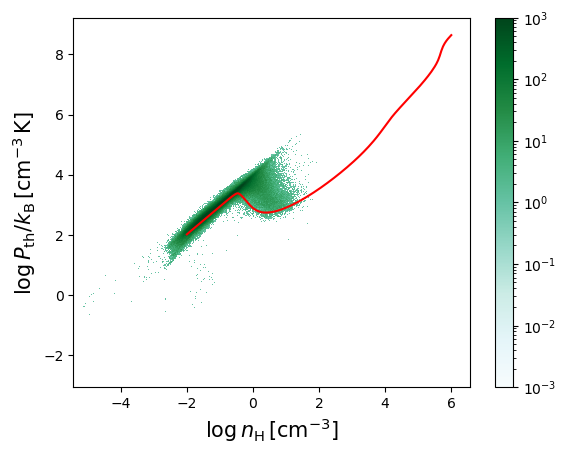

In [55]:
# VOLUME WEIGHTED (= NO WEIGHTED) PDF ACCORDING TO CHANG-GOO'S INSTRUCTIONS for neutral gas

ld_neu = np.log10(ld[np.where(lx < 0.5)])
lp_neu = np.log10(lp[np.where(lx < 0.5)])

h_neu,xedges_neu,yedges_neu=np.histogram2d(ld_neu,lp_neu,bins=[1000,1000])
ht_neu = np.transpose(h_neu)
dx_neu = xedges_neu[1] / xedges_neu[0]
dy_neu = yedges_neu[1] / yedges_neu[0]
pdf_neu = ht_neu/ dx_neu / dy_neu

xbins=0.5*(xedges_neu[1:]+xedges_neu[:-1])
ybins=0.5*(yedges_neu[1:]+yedges_neu[:-1])

plt.pcolormesh(xbins, ybins, pdf_neu, norm=LogNorm(10**-3,10**3), cmap='BuGn',shading='nearest')
plt.plot(np.log10(df['nH']),np.log10(df['pok']),color='red')
plt.colorbar()
plt.xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
plt.ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

Text(0, 0.5, '$\\log{P_{\\rm th}/k_{\\rm B}}\\,[\\rm cm^{-3}\\, K]$')

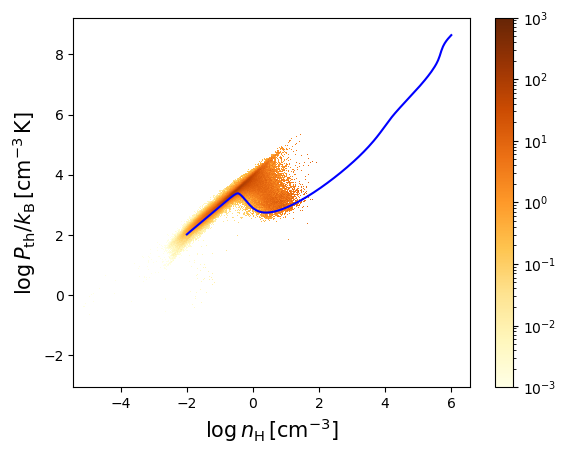

In [56]:
# MASS WEIGHTED PDF ACCORDING TO CHANG-GOO'S INSTRUCTIONS
ld_neu = ld[np.where(lx < 0.5)]
lp_neu = lp[np.where(lx < 0.5)]

h_neu,xedges_neu,yedges_neu=np.histogram2d(np.log10(ld_neu),np.log10(lp_neu),weights=ld_neu,bins=[1000,1000])
ht_neu = np.transpose(h_neu)
dx_neu = xedges_neu[1] / xedges_neu[0]
dy_neu = yedges_neu[1] / yedges_neu[0]
total = ld_neu.sum()
pdf_neu = ht_neu/ dx_neu / dy_neu / np.log10(total)

xbins=0.5*(xedges_neu[1:]+xedges_neu[:-1])
ybins=0.5*(yedges_neu[1:]+yedges_neu[:-1])

plt.pcolormesh(xbins, ybins, pdf_neu, norm=LogNorm(10**-3,10**3), cmap='YlOrBr',shading='nearest')
plt.plot(np.log10(df['nH']),np.log10(df['pok']),color='blue')
plt.colorbar()
plt.xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
plt.ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

Text(0, 0.5, '$\\log{P_{\\rm th}/k_{\\rm B}}\\,[\\rm cm^{-3}\\, K]$')

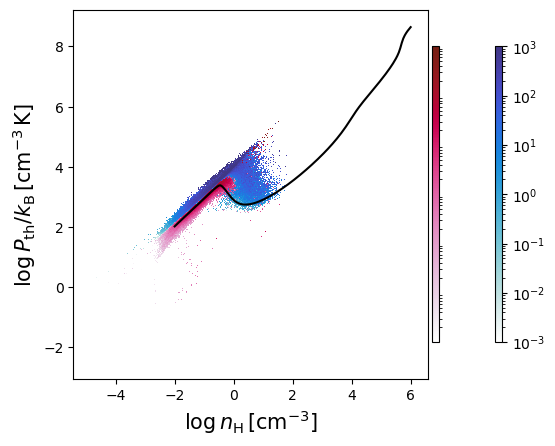

In [57]:
# NET COOLING WEIGHTED PDF ACCORDING TO CHANG-GOO'S INSTRUCTIONS
ld_neu = ld[np.where(lx < 0.5)]
lp_neu = lp[np.where(lx < 0.5)]
lnet_neu = lnet[np.where(lx < 0.5)]

h_neu,xedges_neu,yedges_neu=np.histogram2d(np.log10(ld_neu),np.log10(lp_neu),weights=lnet_neu,bins=[1000,1000])
ht_neu = np.transpose(h_neu)
dx_neu = xedges_neu[1] / xedges_neu[0]
dy_neu = yedges_neu[1] / yedges_neu[0]
total = lnet_neu.sum()
pdf_neu = ht_neu/ dx_neu / dy_neu / np.log10(total)

xbins=0.5*(xedges_neu[1:]+xedges_neu[:-1])
ybins=0.5*(yedges_neu[1:]+yedges_neu[:-1])

import cmasher as cmr
cmap1=cmr.get_sub_cmap(cmr.freeze_r,0.,0.7)
cmap2=cmr.get_sub_cmap(cmr.flamingo_r,0.,0.7)
cbar_kwargs=dict(shrink=0.8,orientation='vertical',location='right')

fig,ax = plt.subplots()
plt.plot(np.log10(df['nH']),np.log10(df['pok']),color='black')
im=plt.pcolormesh(xbins,ybins,pdf_neu,norm=LogNorm(10**-3,10**3),cmap=cmap1,shading='nearest')
cbar=plt.colorbar(im,ax=ax,aspect=40,pad=0,**cbar_kwargs)
im2=plt.pcolormesh(xbins,ybins,-pdf_neu,norm=LogNorm(10**-3,10**3),cmap=cmap2,shading='nearest')
cbar2=plt.colorbar(im2,ax=ax,aspect=40,pad=0.01,**cbar_kwargs)
cbar2.ax.yaxis.set_ticks([])
ax.set_xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
ax.set_ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

#plt.pcolormesh(xbins, ybins, pdf_neu, norm=LogNorm(10**-1,10**5), cmap='YlOrBr',shading='nearest')
#plt.colorbar()
#plt.xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
#plt.ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

In [281]:
models = dict(classic = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8/',
              ncr = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8/',
              no_spiral = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8/')#,
              #demo = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y2.xy1024.eps0.np768.has/')
sa = pa.LoadSimTIGRESSNCRAll(models)    

LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
/home/comejuliet/miniconda3/envs/pyathena/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
/home/comejuliet/miniconda3/envs/pyathena/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzna

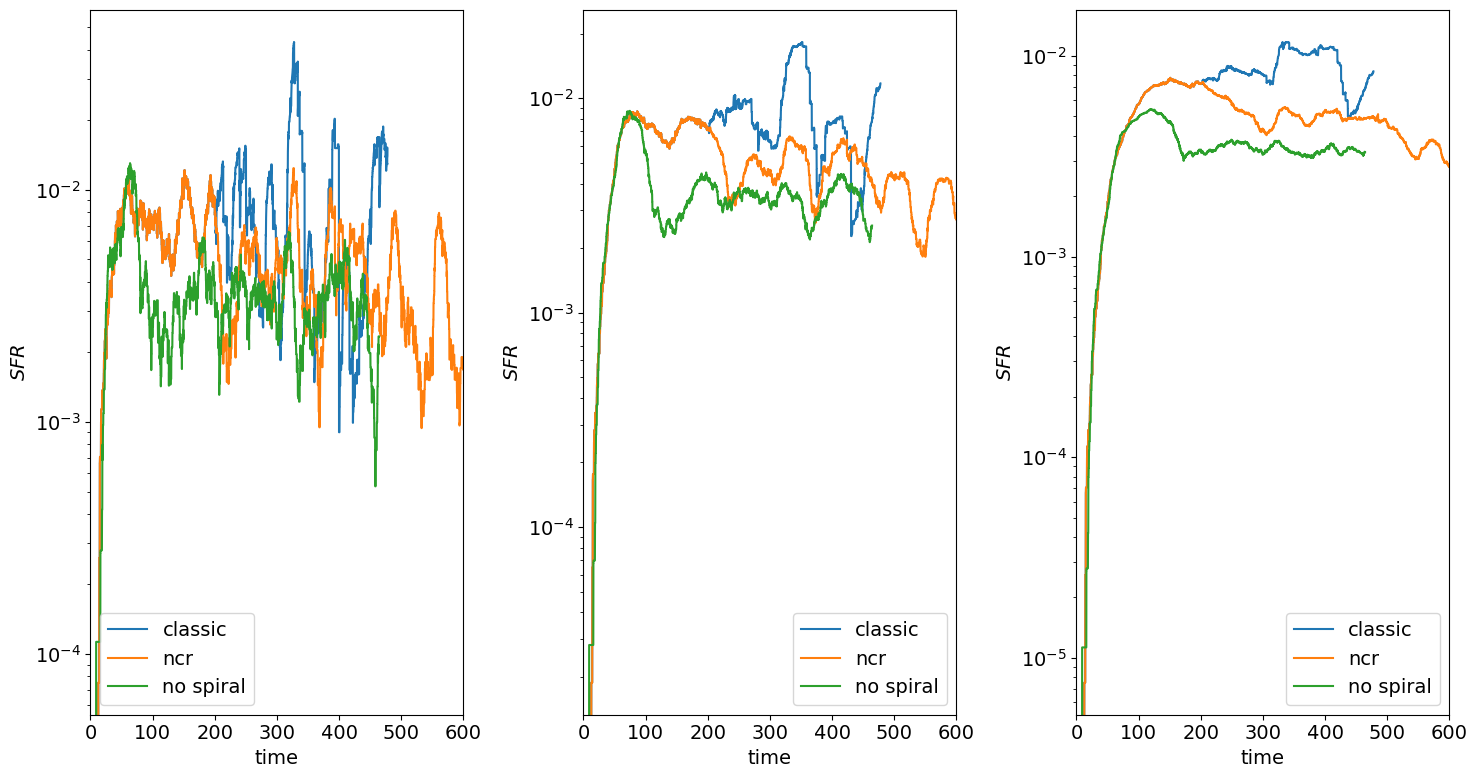

In [282]:
mpl.rcParams['font.size'] = 14
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes = axes.flatten()

legend = ['classic', 'ncr', 'no spiral']

for i, mdl in enumerate(sa.models): 
    
    s = sa.set_model(mdl)
    h = s.read_hst()
    t = h['time_code']
    #kwargs = dict(ls=ls[i])     
        
    plt.sca(axes[0])
    plt.plot(t, h['sfr10'])
    if i == 0:
        #plt.plot(t, 5.0*t**0.5, c='grey', lw=3, alpha=0.5)
        plt.xlabel('time')
        plt.ylabel(r'$SFR$')
        plt.yscale('log')
        plt.xlim(0,600)
    plt.legend(legend, loc=3)
    #plt.axhline(y = 0.0045)
    #plt.axhline(y = 0.0079)
    #plt.axhline(y = 0.0033)

    plt.sca(axes[1])
    plt.plot(t, h['sfr40'])
    #plt.axhline(y = 0.0045,color = 'tab:blue')
    #plt.axhline(y = 0.0079,color = 'tab:orange')
    #plt.axhline(y = 0.0033,color = 'tab:green')
    if i == 0:
        #plt.plot(t, 5.0*t**0.5, c='grey', lw=3, alpha=0.5)
        plt.xlabel('time')
        plt.ylabel(r'$SFR$')
        plt.yscale('log')
        plt.xlim(0,600)
    plt.legend(legend)
        
    plt.sca(axes[2])
    plt.plot(t, h['sfr100'])
    #plt.axhline(y = 0.0045,color = 'tab:blue')
    #plt.axhline(y = 0.0079,color = 'tab:orange')
    #plt.axhline(y = 0.0033,color = 'tab:green')
    if i == 0:
        #plt.plot(t, 5.0*t**0.5, c='grey', lw=3, alpha=0.5)
        plt.xlabel('time')
        plt.ylabel(r'$SFR$')
        plt.yscale('log')
        plt.xlim(0,600)
    plt.legend(legend)
    
##################################
# plot for early evolution
s_early = pa.LoadSimTIGRESSNCR('/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3/')
h = s_early.read_hst()
t = h['time_code']  
        
plt.sca(axes[0])
plt.plot(t, h['sfr10'],color='tab:green')
if i == 0:
    #plt.plot(t, 5.0*t**0.5, c='grey', lw=3, alpha=0.5)
    plt.xlabel('time')
    plt.ylabel(r'$SFR$')
    plt.yscale('log')
    plt.xlim(0,600)

plt.sca(axes[1])
plt.plot(t, h['sfr40'],color='tab:green')
if i == 0:
    #plt.plot(t, 5.0*t**0.5, c='grey', lw=3, alpha=0.5)
    plt.xlabel('time')
    plt.ylabel(r'$SFR$')
    plt.yscale('log')
    plt.xlim(0,600)
      
plt.sca(axes[2])
plt.plot(t, h['sfr100'],color='tab:green')
if i == 0:
    #plt.plot(t, 5.0*t**0.5, c='grey', lw=3, alpha=0.5)
    plt.xlabel('time')
    plt.ylabel(r'$SFR$')
    plt.yscale('log')
    plt.xlim(0,600)
###################################

plt.tight_layout()

In [308]:
# calculate average SFR value for the three models 
# in the time interval 100-460 Myrs where the spiral potential is at full strength

sfr10avg = []
sfr40avg = []
sfr100avg = []
for i, mdl in enumerate(sa.models): 
    s = sa.set_model(mdl)

#s = ncr
    h = s.read_hst()
    t = h['time_code']
    for time in t:
        if time > 100 and time < 460:
            t_full = time
            sfr10 = h['sfr100']
            sfr40 = h['sfr40']
            sfr100 = h['sfr100']
            sfr10_avg = np.average(sfr10)
            sfr40_avg = np.average(sfr40)
            sfr100_avg = np.average(sfr100)
    sfr10avg.append(sfr10_avg)
    sfr40avg.append(sfr40_avg)
    sfr100avg.append(sfr100_avg)


for i in range(3):    

    print('sfr10:', f"{sfr10avg[i]:.4}", 'Msun Myr^-1' )
    print('sfr40:', f"{sfr40avg[i]:.4}", 'Msun Myr^-1' )
    print('sfr100:', f"{sfr100avg[i]:.4}", 'Msun Myr^-1' )
    print('-----------------------------')

sfr10: 0.007025 Msun Myr^-1
sfr40: 0.007435 Msun Myr^-1
sfr100: 0.007025 Msun Myr^-1
-----------------------------
sfr10: 0.004388 Msun Myr^-1
sfr40: 0.004458 Msun Myr^-1
sfr100: 0.004388 Msun Myr^-1
-----------------------------
sfr10: 0.003432 Msun Myr^-1
sfr40: 0.00342 Msun Myr^-1
sfr100: 0.003432 Msun Myr^-1
-----------------------------


In [292]:
print(sfr100avg)

0.0034324941492285647


## Histogram over t=200-390 Myr of the local SFR surface density 

In [198]:
s = no_spiral
h = s.read_hst()

# define the domain and the size of the xaxis bins
Lx = s.domain['Lx'][0]
Ly = s.domain['Lx'][1]
w = Lx/15

# check which time snapshots are available
print(s.nums)
nsnap = s.nums[-1]-s.nums[0]
print(h['time'])
print(nsnap)

[200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460]
time_code
200.000000    195.558444
200.010217    195.568434
200.021186    195.579160
200.031324    195.589072
200.040412    195.597959
                 ...    
464.250980    453.940997
464.260672    453.950474
464.270349    453.959936
464.280027    453.969399
464.282449    453.971767
Name: time, Length: 26430, dtype: float64
260


In [111]:

# build a function for reading starpar files

def sp_reader(number):
    
    sp = s.load_starpar_vtk(num=number)
    sp['mage'] *= s.u.Myr
    sp['mass'] *= s.u.Msun
    sp['x1'] *= s.u.pc
    sp['x2'] *= s.u.pc
    # first, select only young star particles
    # "young" is a boolean array: True for young, False for old
    young = sp['age'] < 40.
    # second, separate clusters (mass != 0) and runaways (mass == 0)
    # mass of runaway OB stars was set to zero
    # "runaway" and "cluster" are also boolean arrays
    runaway=sp['mass'] == 0
    cluster=sp['mass'] != 0

    # young * cluster is True for young and cluster particles
    young_cluster = young & cluster
    spyoung = sp[young_cluster]

    # change to sp if you want to plot star particles of all ages
    return spyoung

sptot = []
for i in range (210,470):   #how to write the snapshot times in a general way?
    sptot.append(sp_reader(i))

In [112]:
# making a histogram of the total star mass in each x axis bin, for each snapshot 
Msp = np.zeros((nsnap,15))
xbin = np.zeros((nsnap,16))

for i in range (nsnap):
    (Msp[i,:], xbin[i,:]) = np.histogram(sptot[i].x1, bins=15, range = (-Lx/2, Lx/2), weights=sptot[i].mass)
      
# calculating sigma_SFR in each bin, for each snapshot
sigma_SFR = []

# remember to change agemax if you're plotting different populations 
agemax = 40  
for i in range (nsnap):
    sigma_SFR.append(Msp[i,:]/(agemax*w*Ly))


[0.00033769 0.00139023 0.00139023 0.00100442 0.0007511  0.00075869
 0.00268593 0.01054793 0.0291279  0.02946664 0.00853382 0.00209157
 0.00164895 0.00078091 0.00083508]
[-9.55733333e-01 -8.19200000e-01 -6.82666667e-01 -5.46133333e-01
 -4.09600000e-01 -2.73066667e-01 -1.36533333e-01  1.42108547e-17
  1.36533333e-01  2.73066667e-01  4.09600000e-01  5.46133333e-01
  6.82666667e-01  8.19200000e-01  9.55733333e-01]


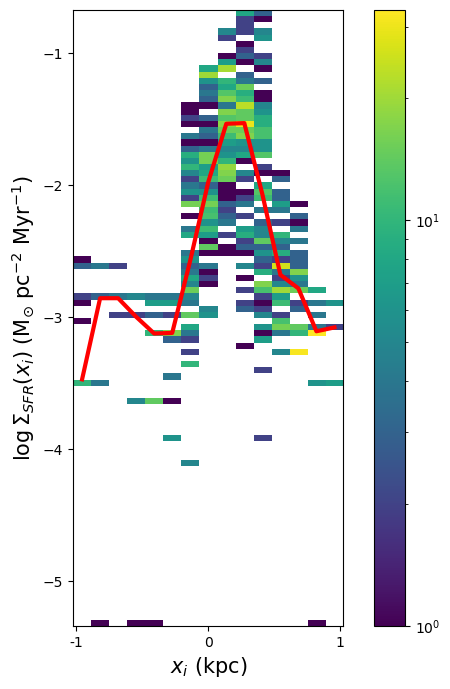

In [113]:
# defining the minimum and maximum value of the SFR surface density 
min_logSFR_x =[]
max_logSFR_x = []

sigma_SFR_cal = np.zeros(nsnap, dtype=object)
for i in range (nsnap):
        # exclude the zero SFR points to avoid - inf in min
        sigma_SFR_cal[i] = [j for j in sigma_SFR[i] if j!= 0]
        max_logSFR_x.append(max(np.log10(sigma_SFR_cal[i])))
        min_logSFR_x.append(min(np.log10(sigma_SFR_cal[i])))
                        
max_logSFR = max(max_logSFR_x)   
min_logSFR = min(min_logSFR_x)

# binning again the values of sigma_SFR at all times in each bin to find the frequency associated with each value
sigma_SFR_x = np.zeros((15,nsnap))
for i in range (nsnap):
    sigma_SFR_x[:,i] = np.log10(sigma_SFR[i][:])
    
sigma_SFRx_binned = []
for i in range (15):
    sigma_SFRx_binned.append(np.histogram(sigma_SFR_x[i,:],bins=100,range=(min_logSFR,max_logSFR)))
    
sfr2d = np.zeros((100,15))
for i in range (15):
    sfr2d[:,i] = sigma_SFRx_binned[i][0]


# finding the median value for overplot 
import statistics 
sigma_SFR_matrix = np.zeros((15,nsnap))
idx = [0.0]*15
sigma_SFR_median = np.zeros(15)
sigmaSFR_nonzero = [0.0]*15

for j in range (nsnap):
    sigma_SFR_matrix[:,j] = sigma_SFR[j]

for i in range(15):
    idx[i] = np.where(sigma_SFR_matrix[i,:] != 0) 
    sigmaSFR_nonzero[i] = sigma_SFR_matrix[i,idx[i]]
    sigma_SFR_median[i] = statistics.median(sigmaSFR_nonzero[i][0])
print(sigma_SFR_median)

# build a new grid on the x axis for plotting the median value
xbin_median = np.zeros(15)
for i in range(15):
    xbin_median[i] = xbin[1,i] + Lx/(15*2)   
print(xbin_median/1000)

plt.figure(3,figsize=(8,8))
plt.imshow(sfr2d, norm=LogNorm(),extent=(-1.024,1.024,max_logSFR,min_logSFR))
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel(r'$x_{i}$ (kpc)',fontsize=15)
plt.ylabel(r'$\log{\Sigma_{SFR}(x_{i})}$ (M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$)',fontsize=15)
plt.plot(xbin_median/1000,np.log10(sigma_SFR_median), color='red', linewidth=3)
plt.xticks(ticks=[-1.0,0.0,1.0], labels=[-1,0,1])
plt.show()

## 2d histograms of the local SFR surface density and the local surface density over snapshots 250-390

In [179]:
# define the domain and the size of the xaxis bins

Lx = s.domain['Lx'][0]
Ly = s.domain['Lx'][1]
Nx = s.domain['Nx'][0]
Ny = s.domain['Nx'][1]
w = Lx/15

# load all the vtk files and calculate sigma_gas for each one 
sigma_gas = []
#mass_gas = []

# get the index of the vtk files
nums = s.nums
npt = len(nums)

for i in range (npt): # for every snapshot
    ds_data = s.load_vtk(num=s.nums[i])
    ds = ds_data.get_field(['density'])
    ds *= s.u.Msun
    # calculate <sigma> 
    sigma = np.trapz(ds['density'],axis=0)
    sigma_yavg = (np.trapz(sigma,axis=0))/Ny
    # bin sigma in the 15 xaxis bins 
    (sigma_snap, xbin) = np.histogram(ds.x,bins=15,range = (-Lx/2, Lx/2), weights=sigma_yavg)
    sigma_gas.append(sigma_snap)

In [181]:
# reading the corresponding starpar files and calculate sigmaSFR for each one
def sp_reader(number):
    
    sp = s.load_starpar_vtk(num=number)
    sp['mage'] *= s.u.Myr
    sp['mass'] *= s.u.Msun
    sp['x1'] *= s.u.pc
    sp['x2'] *= s.u.pc
    # first, select only young star particles
    # "young" is a boolean array: True for young, False for old
    young = sp['age'] < 40.
    # second, separate clusters (mass != 0) and runaways (mass == 0)
    # mass of runaway OB stars was set to zero
    # "runaway" and "cluster" are also boolean arrays
    runaway=sp['mass'] == 0
    cluster=sp['mass'] != 0

    # young * cluster is True for young and cluster particles
    young_cluster = young & cluster
    spyoung = sp[young_cluster]

    return spyoung

sp = []
for i in range (npt):   
    sp.append(sp_reader(nums[i]))

# making a histogram of the total star mass in each x axis bin, for each snapshot 
Msp = np.zeros((npt,15))
xbin = np.zeros((npt,16))

for i in range (npt):
    (Msp[i,:], xbin[i,:]) = np.histogram(sp[i].x1, bins=15, range = (-Lx/2, Lx/2), weights=sp[i].mass)
    
# calculating sigma_SFR in each bin, for each snapshot
sigma_SFR = []
tau_dep = []

agemax = 40
for i in range (npt):
    sigma_SFR.append(Msp[i,:]/(agemax*w*Ly))  
    tau_dep.append(sigma_gas[i][:]/sigma_SFR[i][:]/10**3)

In [187]:
# flatten the arrays over time to build the PDF
def flatten(l):
    return [item for sublist in l for item in sublist]

xdata = flatten(sigma_gas)
ydata = flatten(sigma_SFR)

# to avoid - inf as min when plotting only the young population
ydata_cal = [j for j in ydata if j!= 0]

gaslim = np.array([min(xdata), max(xdata)])
SFRlim = np.array([min(ydata_cal), max(ydata_cal)])
print(gaslim)
print(SFRlim)

[ 2.7961063 76.89946  ]
[7.95342976e-05 2.12925512e-01]


[9.64155610e-05 1.46474676e+00]


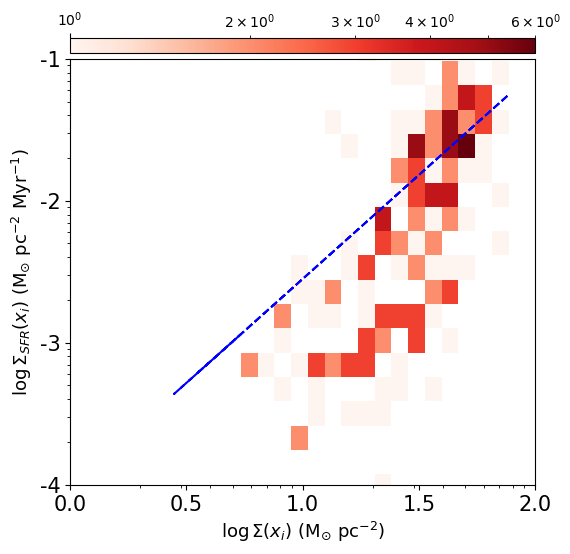

In [188]:
# build pdf for sigma GAS - sigma SFR

from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x**(b)

x = np.log10(xdata)
y = np.log10(ydata)
myrange = [np.log10(gaslim), np.log10(SFRlim)]
pdf, xedge, yedge = np.histogram2d(x, y, bins=20, range=myrange)

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

# plot pdf
plt.figure(figsize=(6,7))
plt.pcolormesh(10**xedge, 10**yedge, pdf.T, norm=LogNorm(), cmap='Reds')
plt.plot(xdata, func(xdata, *popt),linestyle='dashed',color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\log{\Sigma(x_{i})}$ (M$_{\odot}$ pc$^{-2}$)',fontsize=13)
plt.ylabel(r'$\log{\Sigma_{SFR}(x_{i})}$ (M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$)',fontsize=13)
plt.colorbar(location='top', fraction = 0.2, pad = 0.01, aspect = 30)
plt.xlim(1,10**2)
plt.ylim(10**-4,10**-1)
plt.xticks(ticks=[1,10**(0.5),10,10**(1.5),10**2],labels=[0.0,0.5,1.0,1.5,2.0],fontsize=15)
plt.yticks(ticks=[10**(-4),10**(-3),10**(-2),10**(-1)],labels=[-4,-3,-2,-1],fontsize=15)
plt.show()

### Plot for tau depletion and SFR surface density together

In [189]:
# defining the minimum and maximum value of the tau depletion
min_logtau_x =[]
max_logtau_x = []

tau_dep_cal = np.zeros(npt, dtype=object)
for i in range (npt):
        # exclude the zero SFR points to avoid - inf in min
        tau_dep_cal[i] = [j for j in tau_dep[i] if not math.isinf(j)]
        max_logtau_x.append(max(np.log10(tau_dep_cal[i])))
        min_logtau_x.append(min(np.log10(tau_dep_cal[i])))
                        
max_logtau = max(max_logtau_x)   
min_logtau = min(min_logtau_x)

# binning again the values of tau_dep at all times in each bin to find the frequency associated with each value
tau_dep_x = np.zeros((15,npt))
for i in range (0,npt):
    tau_dep_x[:,i] = np.log10(tau_dep[i][:])
    
tau_depx_binned = []
for i in range (15):
    tau_depx_binned.append(np.histogram(tau_dep_x[i,:],bins=30,range=(min_logtau,max_logtau)))
    
tau2d = np.zeros((30,15))
for i in range (15):
    tau2d[:,i] = tau_depx_binned[i][0]
    
###########################################################################

# defining the minimum and maximum value of the SFR surface density 
min_logSFR_x =[]
max_logSFR_x = []

sigma_SFR_cal = np.zeros(npt, dtype=object)
for i in range (npt):
        # exclude the zero SFR points to avoid - inf in min
        sigma_SFR_cal[i] = [j for j in sigma_SFR[i] if j!= 0]
        max_logSFR_x.append(max(np.log10(sigma_SFR_cal[i])))
        min_logSFR_x.append(min(np.log10(sigma_SFR_cal[i])))
                        
max_logSFR = max(max_logSFR_x)   
min_logSFR = min(min_logSFR_x)

# binning again the values of sigma_SFR at all times in each bin to find the frequency associated with each value
sigma_SFR_x = np.zeros((15,npt))
for i in range (0,npt):
    sigma_SFR_x[:,i] = np.log10(sigma_SFR[i][:])
    
sigma_SFRx_binned = []
for i in range (15):
    sigma_SFRx_binned.append(np.histogram(sigma_SFR_x[i,:],bins=30,range=(min_logSFR,max_logSFR)))
    
sfr2d = np.zeros((30,15))
for i in range (15):
    sfr2d[:,i] = sigma_SFRx_binned[i][0]
    
###########################################################################

# defining the minimum and maximum value of the GAS surface density 
min_logGAS_x =[]
max_logGAS_x = []

for i in range (npt):
        max_logGAS_x.append(max(np.log10(sigma_gas[i])))
        min_logGAS_x.append(min(np.log10(sigma_gas[i])))
                        
max_logGAS = max(max_logGAS_x)   
min_logGAS = min(min_logGAS_x)

# binning again the values of sigma_GAS at all times in each bin to find the frequency associated with each value
sigma_GAS_x = np.zeros((15,npt))
for i in range (0,npt):
    sigma_GAS_x[:,i] = np.log10(sigma_gas[i][:])
    
sigma_GASx_binned = []
for i in range (15):
    sigma_GASx_binned.append(np.histogram(sigma_GAS_x[i,:],bins=30,range=(min_logGAS,max_logGAS)))
    
gas2d = np.zeros((30,15))
for i in range (15):
    gas2d[:,i] = sigma_GASx_binned[i][0]   

In [190]:
# calculate the median values   
import statistics 

sigma_SFR_matrix = np.zeros((13,npt))
sigma_GAS_matrix = np.zeros((15,npt))
sigma_SFR_matrix_new = np.zeros((13,npt))
sigma_SFR_median = np.zeros(13)
sigma_GAS_median = np.zeros(15)
idx_SFR = [0.0]*13
sigmaSFR_nonzero = [0.0]*13
idx_taudep = [0.0]*13
taudep_nonzero = [0.0]*13

for j in range (npt):
    sigma_SFR_matrix[:,j] = sigma_SFR[j][2:15]
    sigma_GAS_matrix[:,j] = sigma_gas[j][0:15]
    
for i in range (13):
    idx_SFR[i] = np.where(sigma_SFR_matrix[i,:] != 0) 
    sigmaSFR_nonzero[i] = sigma_SFR_matrix[i,idx_SFR[i]]
    sigma_SFR_median[i] = statistics.median(sigmaSFR_nonzero[i][0])
    
tau_dep_matrix = np.zeros((13,npt))
tau_dep_median = np.zeros(13)
for j in range (npt):
    tau_dep_matrix[:,j] = tau_dep[j][2:15]
    
for i in range (13):
    idx_taudep[i] = np.isfinite(tau_dep_matrix[i,:]) 
    taudep_nonzero[i] = tau_dep_matrix[i,idx_taudep[i]]
    tau_dep_median[i] = statistics.median(taudep_nonzero[i])
    
for i in range (15):
    sigma_GAS_median[i] = statistics.median(sigma_GAS_matrix[i,:])
       
# new grid for median plot
xbin_median = np.zeros(15)
for i in range(15):
    xbin_median[i] = xbin[1,i] + Lx/(15*2)
    
print(xbin_median/1000)

[-9.55733333e-01 -8.19200000e-01 -6.82666667e-01 -5.46133333e-01
 -4.09600000e-01 -2.73066667e-01 -1.36533333e-01  1.42108547e-17
  1.36533333e-01  2.73066667e-01  4.09600000e-01  5.46133333e-01
  6.82666667e-01  8.19200000e-01  9.55733333e-01]


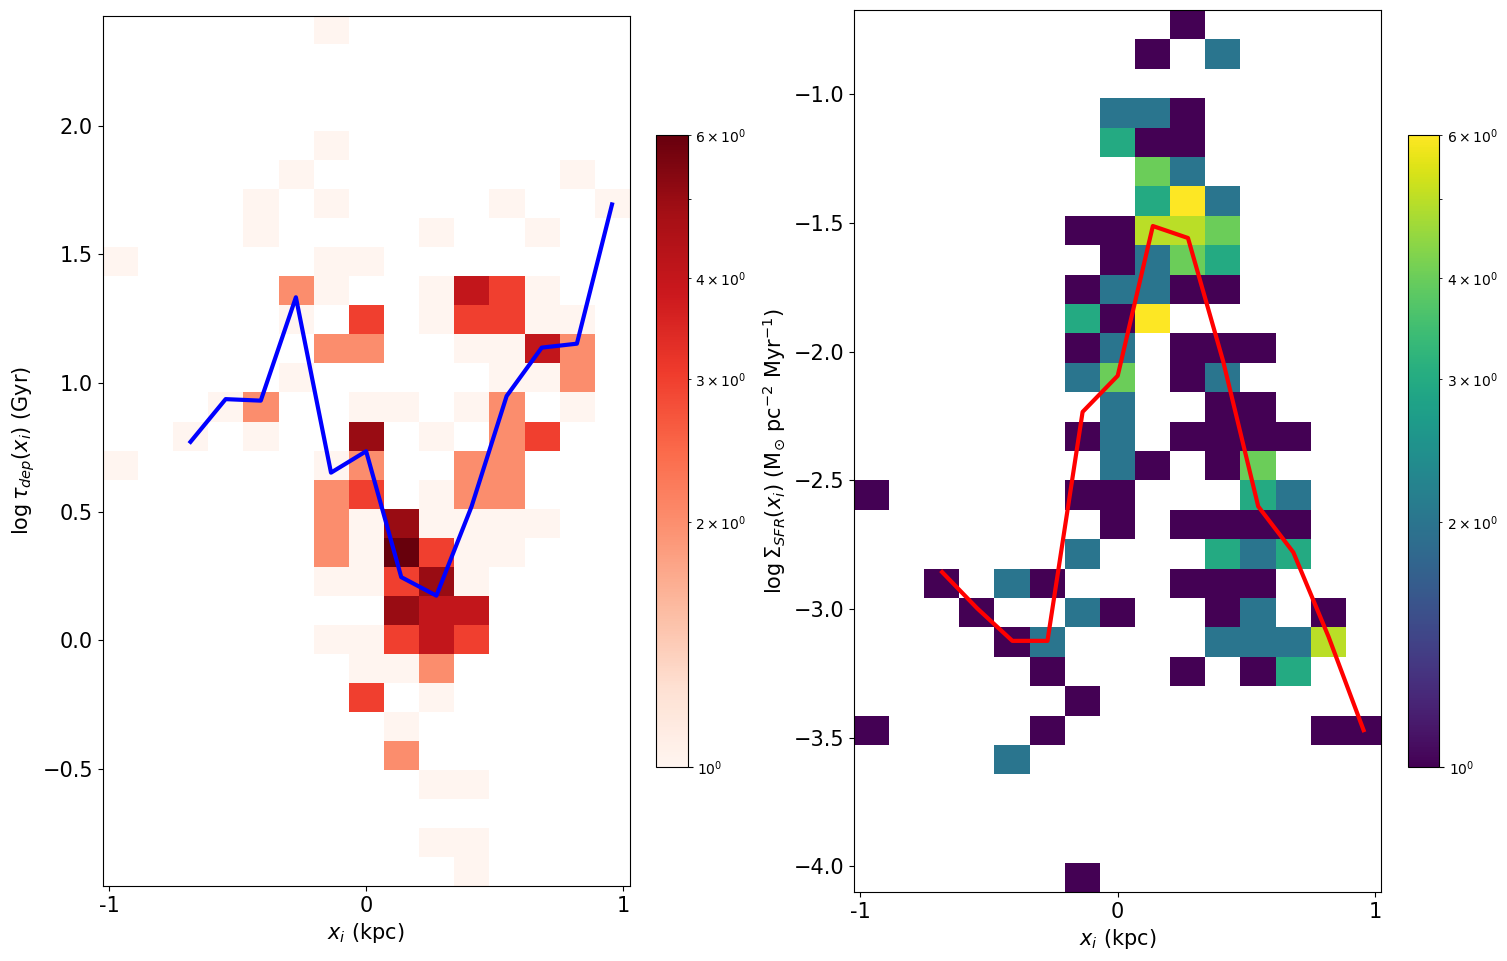

In [191]:
#PLOTS
fig, axes = plt.subplots(1, 2, figsize=(15,10), layout="constrained")

im1 = axes[0].imshow(tau2d, norm=LogNorm(), origin = 'lower', extent=(-1.024,1.024,min_logtau,max_logtau), cmap='Reds')
plt.colorbar(im1, ax=axes[0],location='right',fraction=0.06)

im2 = axes[1].imshow(sfr2d, norm=LogNorm(), origin = 'lower', extent=(-1.024,1.024,min_logSFR,max_logSFR))
plt.colorbar(im2, ax=axes[1],location='right', fraction = 0.06)
#plt.gca().invert_yaxis(im2)

im1.axes.set_xlabel(r'$x_{i}$ (kpc)',fontsize=15)
im2.axes.set_xlabel(r'$x_{i}$ (kpc)',fontsize=15)
im1.axes.set_ylabel(r'$\log{\tau_{dep}(x_{i})}$ (Gyr)',fontsize=15)
im2.axes.set_ylabel(r'$\log{\Sigma_{SFR}(x_{i})}$ (M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$)',fontsize=15)
im1.axes.plot(xbin_median[2:15]/1000,np.log10(tau_dep_median), color='blue', linewidth='3')
im2.axes.plot(xbin_median[2:15]/1000,np.log10(sigma_SFR_median), color='red',linewidth='3')
im1.axes.set_xticks(ticks=[-1.0,0.0,1.0], labels=[-1,0,1], fontsize=15)
im2.axes.set_xticks(ticks=[-1.0,0.0,1.0], labels=[-1,0,1], fontsize=15)
im1.axes.tick_params(axis='y', labelsize=15)
im2.axes.tick_params(axis='y', labelsize=15)
plt.show()


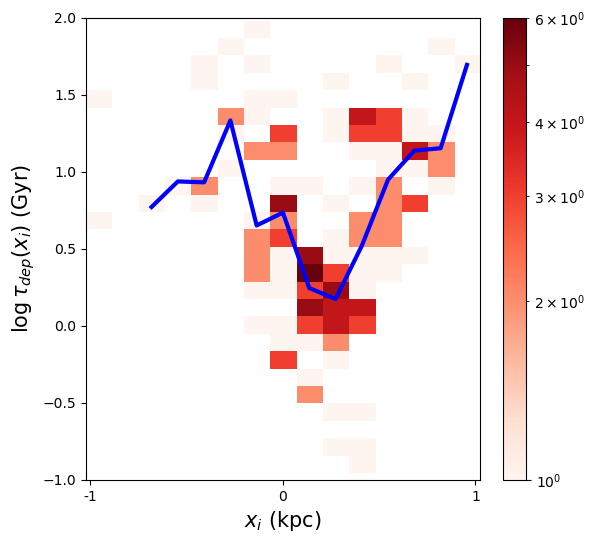

In [192]:
plt.figure(figsize=(6,6))
plt.imshow(tau2d, norm=LogNorm(), origin = 'lower', extent=(-1.024,1.024,min_logtau,max_logtau), cmap='Reds', aspect = 0.8)
plt.colorbar(fraction=0.06)
#plt.gca().invert_yaxis()
plt.xlabel(r'$x_{i}$ (kpc)',fontsize=15)
plt.ylabel(r'$\log{\tau_{dep}(x_{i})}$ (Gyr)',fontsize=15)
plt.plot(xbin_median[2:15]/1000,np.log10(tau_dep_median), color='blue', linewidth=3)
plt.xticks(ticks=[-1.0,0.0,1.0], labels=[-1,0,1])
plt.ylim(-1,2)
plt.show()

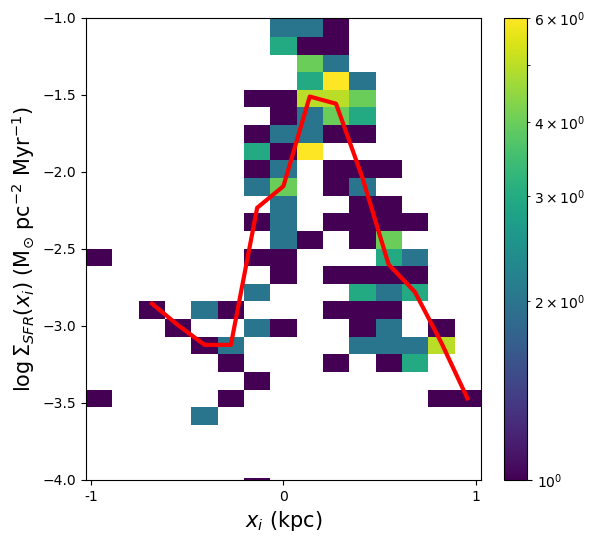

In [193]:
fig = plt.figure(figsize=(6,6))
plt.imshow(sfr2d, norm=LogNorm(), origin = 'lower', extent=(-1.024,1.024,min_logSFR,max_logSFR), aspect = 0.8)
plt.colorbar(fraction=0.06)
#plt.gca().invert_yaxis()
plt.xlabel(r'$x_{i}$ (kpc)',fontsize=15)
plt.ylabel(r'$\log{\Sigma_{SFR}(x_{i})}$ (M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$)',fontsize=15)
plt.plot(xbin_median[2:15]/1000,np.log10(sigma_SFR_median), color='red',linewidth='3')
plt.xticks(ticks=[-1.0,0.0,1.0], labels=[-1,0,1])
plt.ylim(-4,-1)
plt.show()
fig.set_size_inches(10, 10)

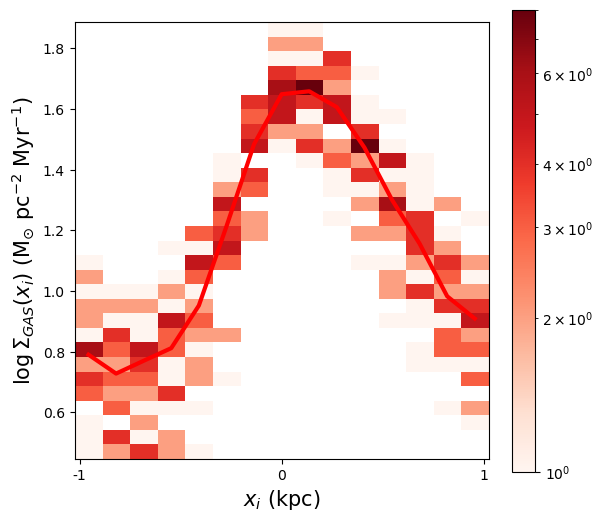

In [197]:
fig = plt.figure(figsize=(6,6))
plt.imshow(gas2d, norm=LogNorm(), origin = 'lower', extent=(-1.024,1.024,min_logGAS,max_logGAS),  cmap='Reds', aspect = 1.5)
plt.colorbar(fraction=0.06)
#plt.gca().invert_yaxis()
plt.xlabel(r'$x_{i}$ (kpc)',fontsize=15)
plt.ylabel(r'$\log{\Sigma_{GAS}(x_{i})}$ (M$_{\odot}$ pc$^{-2}$ Myr$^{-1}$)',fontsize=15)
plt.plot(xbin_median/1000,np.log10(sigma_GAS_median), color='red',linewidth='3')
plt.xticks(ticks=[-1.0,0.0,1.0], labels=[-1,0,1])
#plt.ylim(-4,-1)
plt.show()
fig.set_size_inches(10, 10)

In [104]:
np.log10(sigma_GAS_median)

array([0.48871567, 0.42644247, 0.46869235, 0.51036767, 0.65094183,
       0.9119641 , 1.18303301, 1.32039586, 1.35741018, 1.31249293,
       1.17497462, 1.00123819, 0.85935252, 0.68774487, 0.63682493])

In [103]:
np.log10(sigma_SFR_median)

array([-2.85691316, -2.99808542, -3.12430033, -3.12430033, -2.23426525,
       -2.09368092, -1.51178787, -1.5583535 , -2.03651868, -2.60166869,
       -2.78035799, -3.10739957, -3.47148472])

In [95]:
xbin_median/1000

array([-9.55733333e-01, -8.19200000e-01, -6.82666667e-01, -5.46133333e-01,
       -4.09600000e-01, -2.73066667e-01, -1.36533333e-01,  1.42108547e-17,
        1.36533333e-01,  2.73066667e-01,  4.09600000e-01,  5.46133333e-01,
        6.82666667e-01,  8.19200000e-01,  9.55733333e-01])

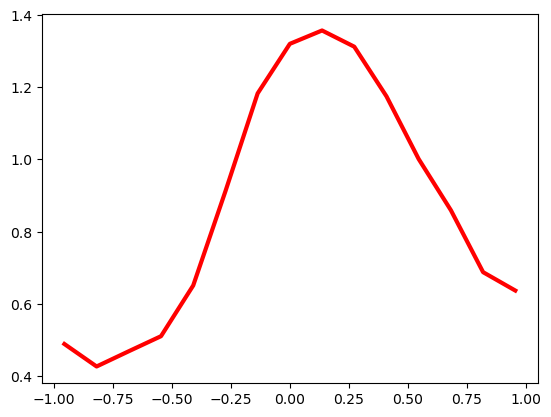

In [105]:
plt.plot(xbin_median/1000,np.log10(sigma_GAS_median), color='red',linewidth='3')